In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothicCoding')
SEED = 42

train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
train_data=train_data.iloc[:,1:]
train_data


,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [213]:
train_data.loc[train_data['근로기간']=='3','근로기간']='3 years'
test_data.loc[test_data['근로기간']=='3','근로기간']='3 years'
test_data.loc[test_data['근로기간']=='1 year','근로기간']='1 years'
train_data.loc[train_data['근로기간']=='1 year','근로기간']='1 years'
test_data.loc[test_data['근로기간']=='<1 year','근로기간']='< 1 year'
train_data.loc[train_data['근로기간']=='<1 year','근로기간']='< 1 year'
test_data.loc[test_data['근로기간']=='10+years','근로기간']='10+ years'
train_data.loc[train_data['근로기간']=='10+years','근로기간']='10+ years'
train_data.value_counts('근로기간')

근로기간
10+ years    32481
2 years       8450
< 1 year      8144
3 years       7670
1 years       6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

In [207]:
values_map=dict({'6 years':6,
 '10+ years':10,
 '5 years':5,
 '8 years':8,
 '9 years':9,
 '2 years':2,
 '1 years':1,
 '3 years':3,
 '7 years':7,
 '4 years':4,
 '< 1 year':0})

In [208]:
# train_data['근로기간']=train_data['근로기간'].map(values_map)

In [214]:
train_data['근로기간'] = train_data['근로기간'].replace(values_map)

In [215]:
train_data['주택소유상태'] = train_data['주택소유상태'].replace({'ANY':'MORTGAGE'})

In [216]:
train_data['근로기간'].unique()

array([6, 10, 5, 8, 'Unknown', 9, 2, 1, 3, 7, 4, 0], dtype=object)

In [217]:
train_data['대출기간'] = train_data['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
train_data

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36.0,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60.0,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36.0,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36.0,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60.0,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36.0,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60.0,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36.0,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36.0,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [218]:
group_train_data=train_data.groupby('대출등급',group_keys=True).apply(lambda x:x)
group_train_data

대출금액  대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
대출등급                                                                      
A    2      12000000  36.0    5  MORTGAGE   96000000         8.60    14   
     5       4800000  36.0   10      RENT   84000000        13.78    30   
     13     12000000  36.0   10  MORTGAGE   48000000        11.94    11   
     17      9600000  36.0    8      RENT   74400000        11.98    35   
     21      8400000  36.0    7  MORTGAGE   42000000        19.00    22   
...              ...   ...  ...       ...        ...          ...   ...   
G    94294  17130000  60.0    7  MORTGAGE   50400000        21.23    25   
     94324  29100000  60.0    3  MORTGAGE   76800000        18.24    32   
     94543  42000000  60.0    4      RENT  114000000        10.30    12   
     95477  30000000  60.0    1  MORTGAGE  120000000        18.05    14   
     95658  10590000  36.0   10  MORTGAGE   31200000        29.59    19   

             대출목적  최근_2년간_연체_횟수   총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  
대출등급                                                                   
A    2      부채 통합             0  928644   151944.0    0.0    0.0    A  
     5         휴가             0  240216    55428.0    0.0    0.0    A  
     13     부채 통합             1  303972    58236.0    0.0    0.0    A  
     17     부채 통합             0  476016   116268.0    0.0    0.0    A  
     21     주택 개선             0  850164   179196.0    0.0    0.0    A  
...           ...           ...     ...        ...    ...    ...  ...  
G    94294     기타             0  398892  1176840.0    0.0    0.0    G  
     94324  신용 카드             0  711108  1926708.0    0.0    0.0    G  
     94543  부채 통합             0  665388  2009016.0    0.0    0.0    G  
     95477  부채 통합             0  490824  1266156.0    0.0    0.0    G  
     95658  부채 통합             0  799176   921204.0    0.0    0.0    G  

[96294 rows x 14 columns]

In [219]:
train_data.dtypes

대출금액              int64
대출기간            float64
근로기간             object
주택소유상태           object
연간소득              int64
부채_대비_소득_비율     float64
총계좌수              int64
대출목적             object
최근_2년간_연체_횟수      int64
총상환원금             int64
총상환이자           float64
총연체금액           float64
연체계좌수           float64
대출등급             object
dtype: object

In [220]:
num_data=train_data.select_dtypes(['int64','float64'])
num_data

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,12480000,36.0,72000000,18.90,15,0,0,0.0,0.0,0.0
1,14400000,60.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0
2,12000000,36.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0
3,14400000,36.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0
4,18000000,60.0,71736000,25.39,19,0,228540,148956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36.0,210000000,9.33,33,0,974580,492168.0,0.0,0.0
96290,28800000,60.0,132000000,5.16,25,0,583728,855084.0,0.0,0.0
96291,14400000,36.0,84000000,11.24,22,0,1489128,241236.0,0.0,0.0
96292,15600000,36.0,66330000,17.30,21,2,1378368,818076.0,0.0,0.0


In [221]:
object_data=train_data.select_dtypes(['object'])
object_data

,근로기간,주택소유상태,대출목적,대출등급
0,6,RENT,부채 통합,C
1,10,MORTGAGE,주택 개선,B
2,5,MORTGAGE,부채 통합,A
3,8,MORTGAGE,부채 통합,C
4,Unknown,RENT,주요 구매,B
...,...,...,...,...
96289,10,MORTGAGE,신용 카드,C
96290,10,MORTGAGE,주택 개선,E
96291,1,MORTGAGE,신용 카드,A
96292,5,MORTGAGE,부채 통합,D


In [222]:
num_data['대출등급']=train_data['대출등급']
num_data

,대출금액,대출기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36.0,72000000,18.90,15,0,0,0.0,0.0,0.0,C
1,14400000,60.0,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
2,12000000,36.0,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A
3,14400000,36.0,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C
4,18000000,60.0,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36.0,210000000,9.33,33,0,974580,492168.0,0.0,0.0,C
96290,28800000,60.0,132000000,5.16,25,0,583728,855084.0,0.0,0.0,E
96291,14400000,36.0,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36.0,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,D


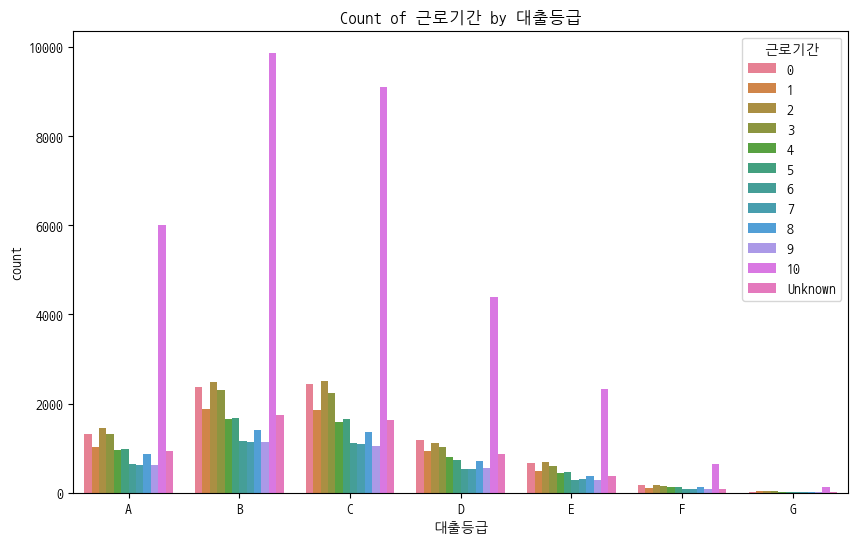

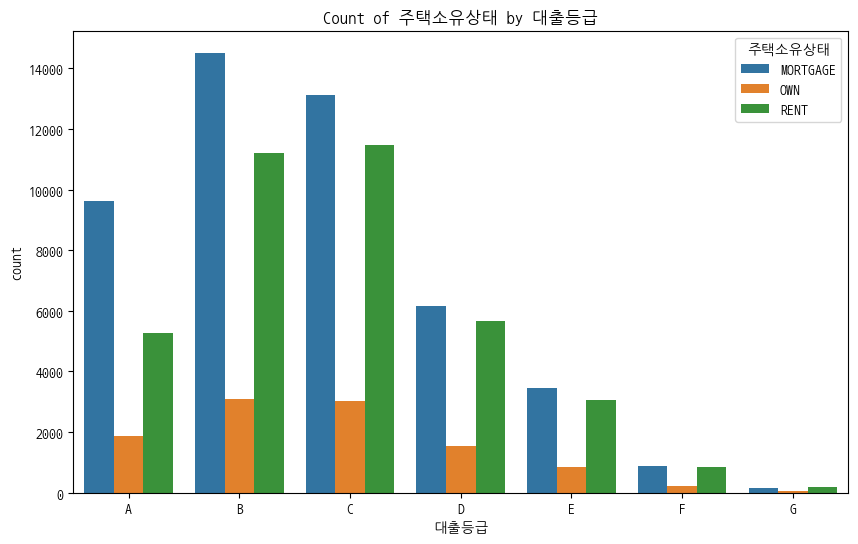

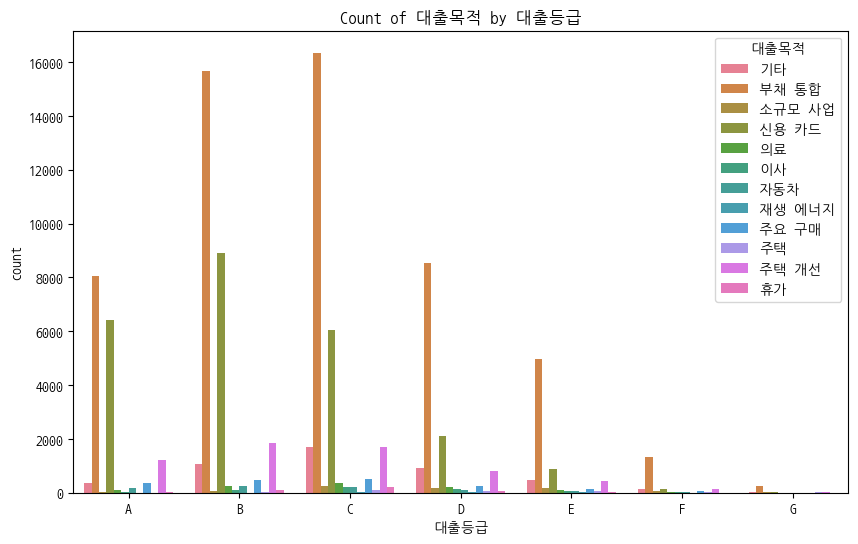

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


object_columns = object_data.select_dtypes(include=[object])

for column in object_columns.columns:
    if column != '대출등급': 
        count_data = object_data.groupby(['대출등급', column]).size().reset_index(name='count')
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y='count', hue=column, data=count_data)
        plt.title(f'Count of {column} by 대출등급')
        plt.show()


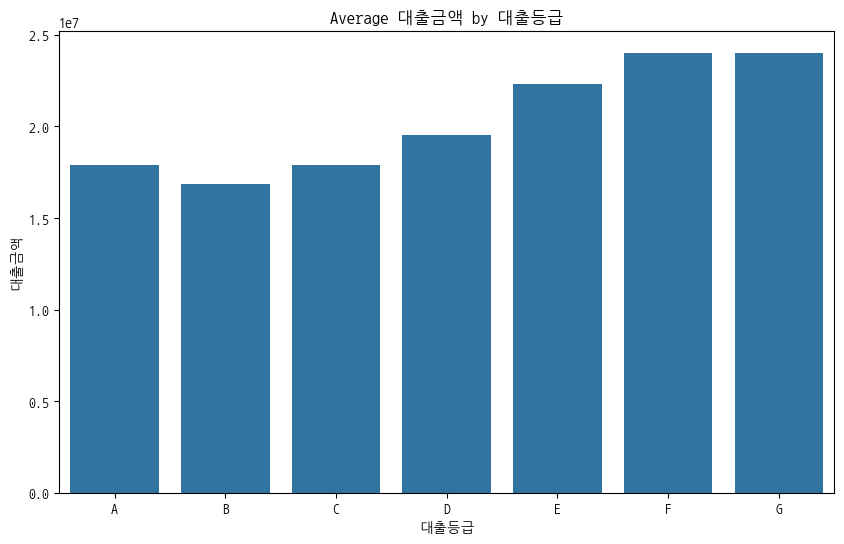

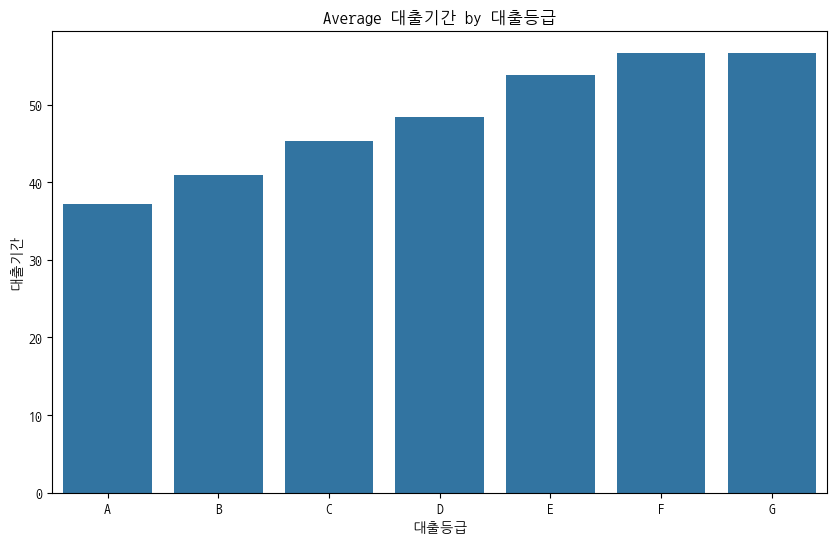

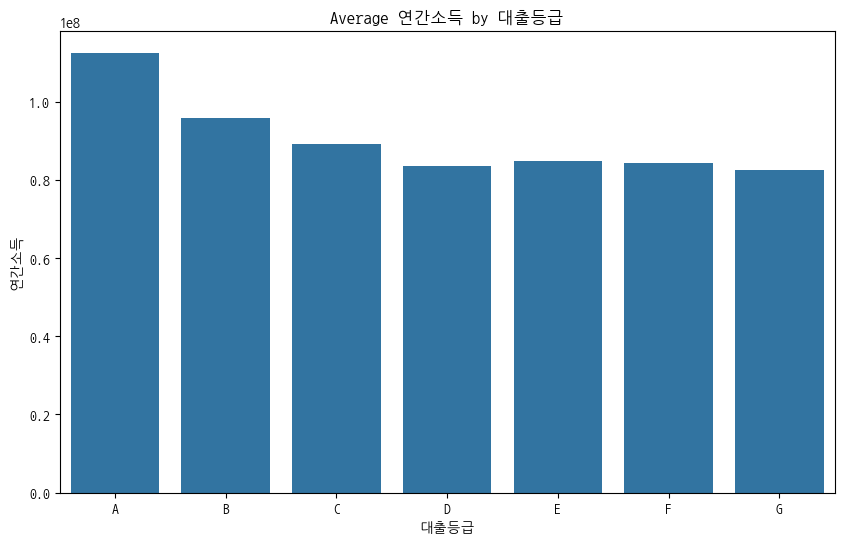

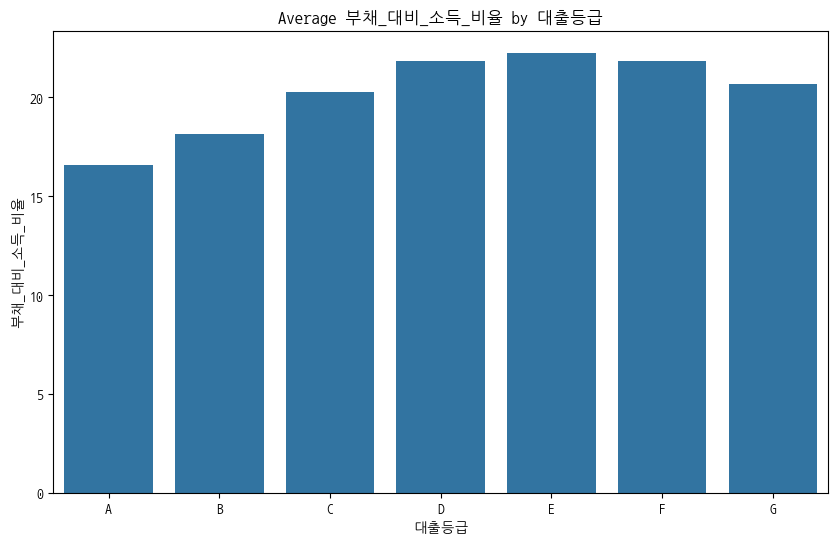

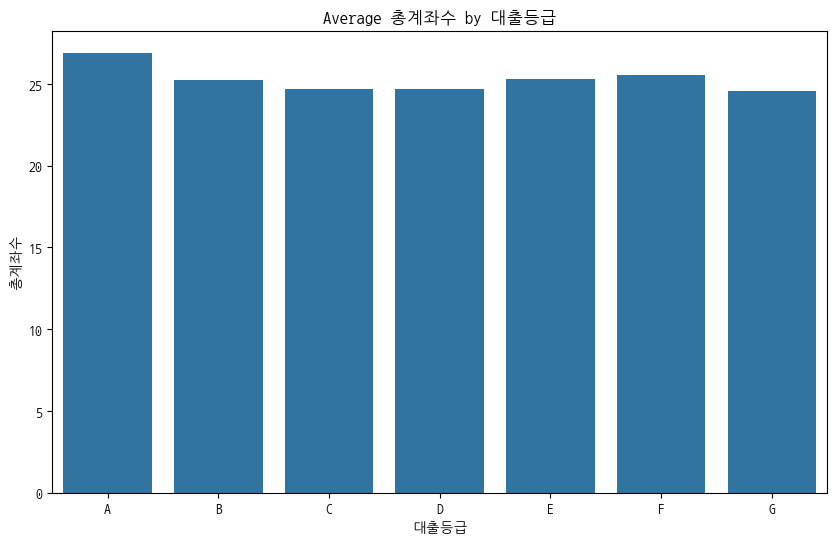

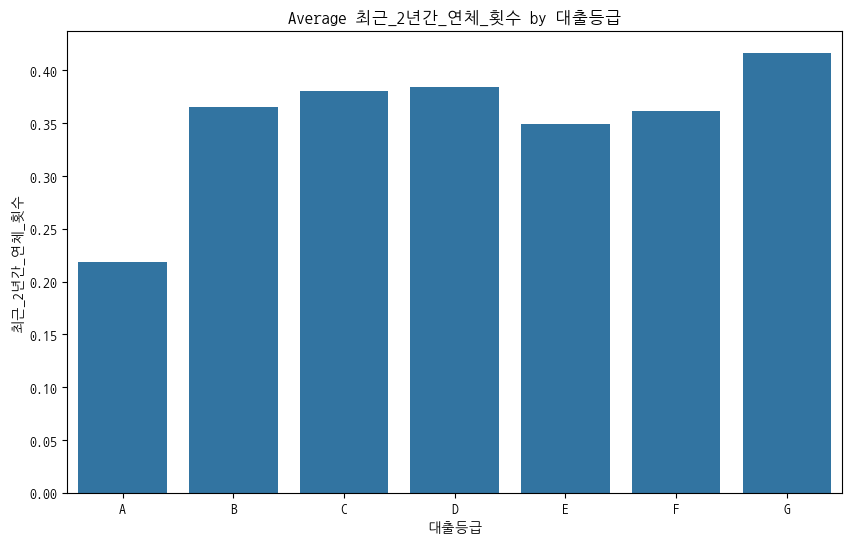

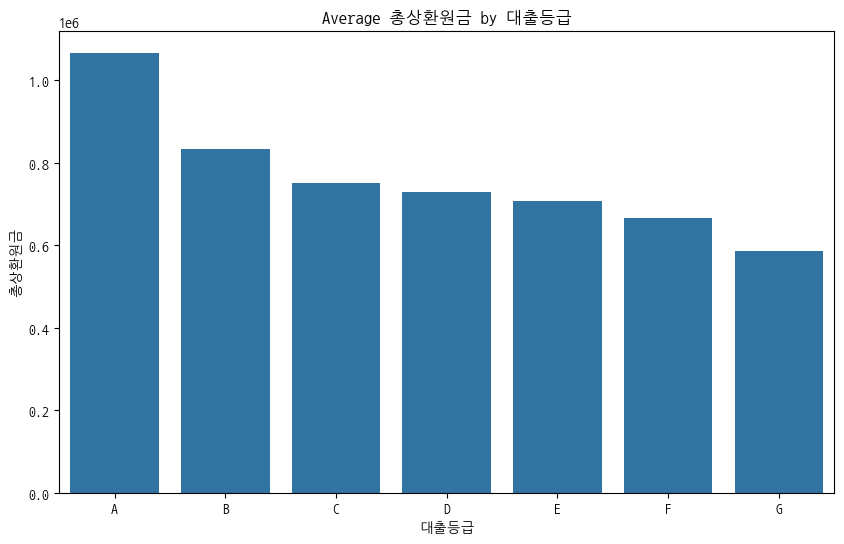

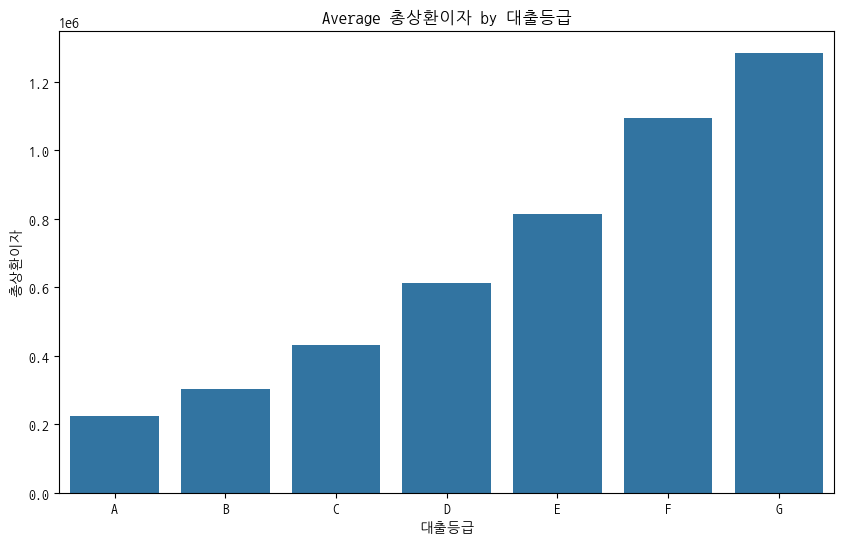

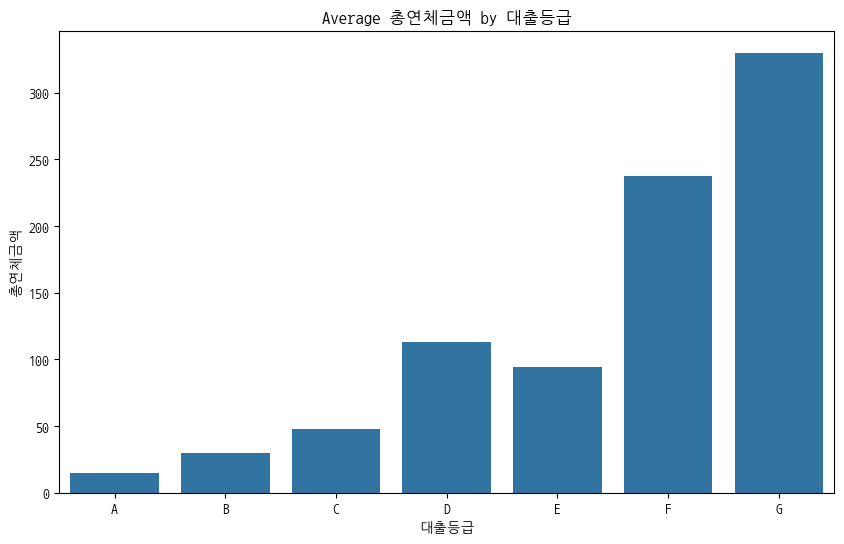

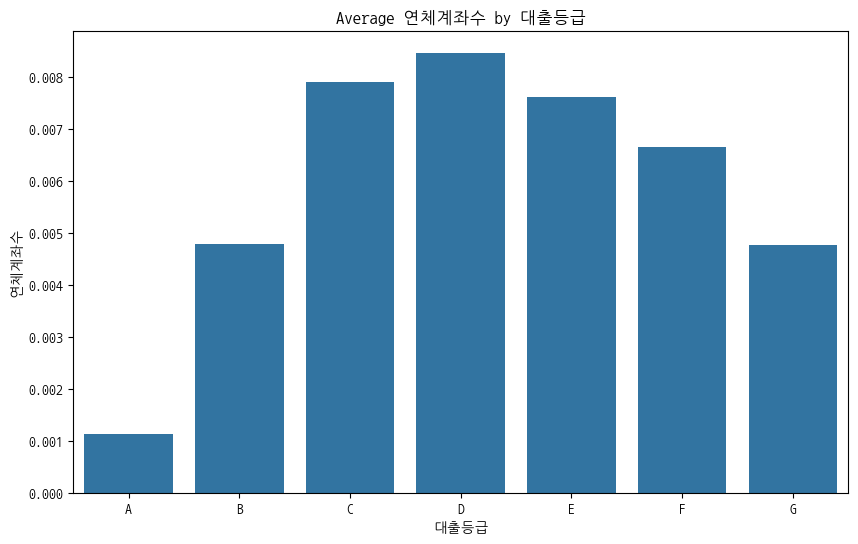

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped_data = num_data.groupby('대출등급').mean().reset_index()

for column in grouped_data.columns:
    if grouped_data[column].dtype in ['float64', 'int64'] and column != '대출등급':
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y=column, data=grouped_data)
        plt.title(f'Average {column} by 대출등급')
        plt.show()


# 근로기간

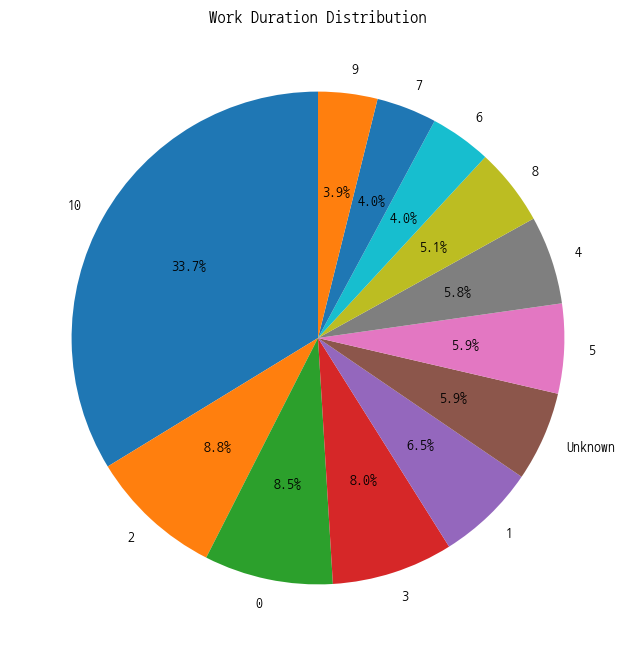

In [225]:
work_duration_counts = train_data['근로기간'].value_counts()
plt.figure(figsize=(10, 8))  
work_duration_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)  
plt.title('Work Duration Distribution')  
plt.ylabel('')  
plt.show()  

- 지금 신용등급이 낮은 데이터가 현저하게 적음
- 반대로 A등급 같은 경우 10+ 많이 나타남
- 우리가 가지고 있는데이터에는 근무 기간 10년 이상이 가장 많음 주의해서 봐야함>>신용등급A가 10+ 나왔다고 유의미한가? 단순이 10+데이터가 많아서 나온거 일 수도 있음

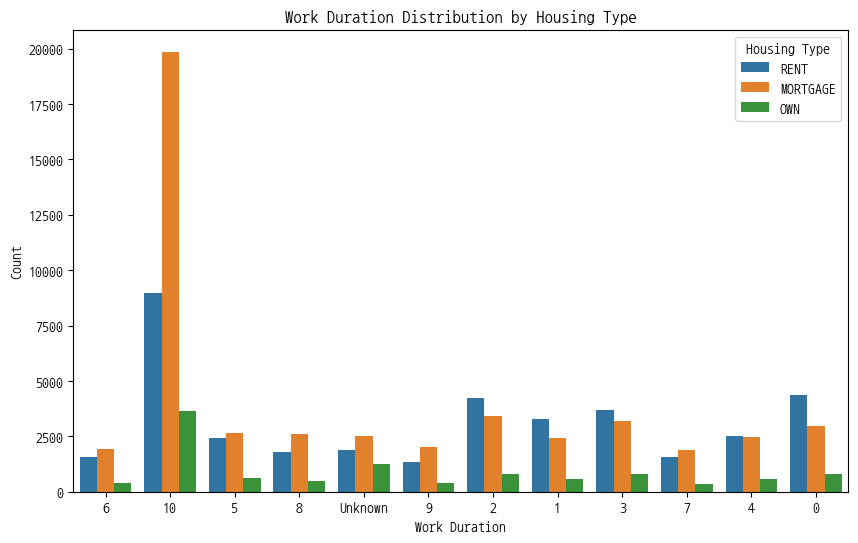

In [226]:
plt.figure(figsize=(10, 6))
sns.countplot(x='근로기간', hue='주택소유상태', data=train_data)
plt.title('Work Duration Distribution by Housing Type')
plt.xlabel('Work Duration')
plt.ylabel('Count')
plt.legend(title='Housing Type')
plt.show()

- 근무 기간 별로 주택의 소유 상태를 확인해봄
- 모기지의 형태가 10+ 앞도적으로 나오는 상태임, 다른 근무기간에서는 찾기 힘듬
- 반대로 근무기간이 낮으면 랜트의 형식이 많음
- 이는 10+ 고수익은 안정적으로 주택담보로 대출이 가능하다는 것을 나타내고, 근무기간이 낮은 사람들은 그것이 불가능하다는 것을 알려주고 있음.
- 결론 기관에서 대출을 해줄땐 근무기간이 길면 장기적으로 안정적으로 받을수 있는 모기지, 근무기간이 낮으면 단기로 확실하게 받아야하는 랜트임

In [227]:
train_data['근로기간'].unique()

array([6, 10, 5, 8, 'Unknown', 9, 2, 1, 3, 7, 4, 0], dtype=object)

/home/lab01/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


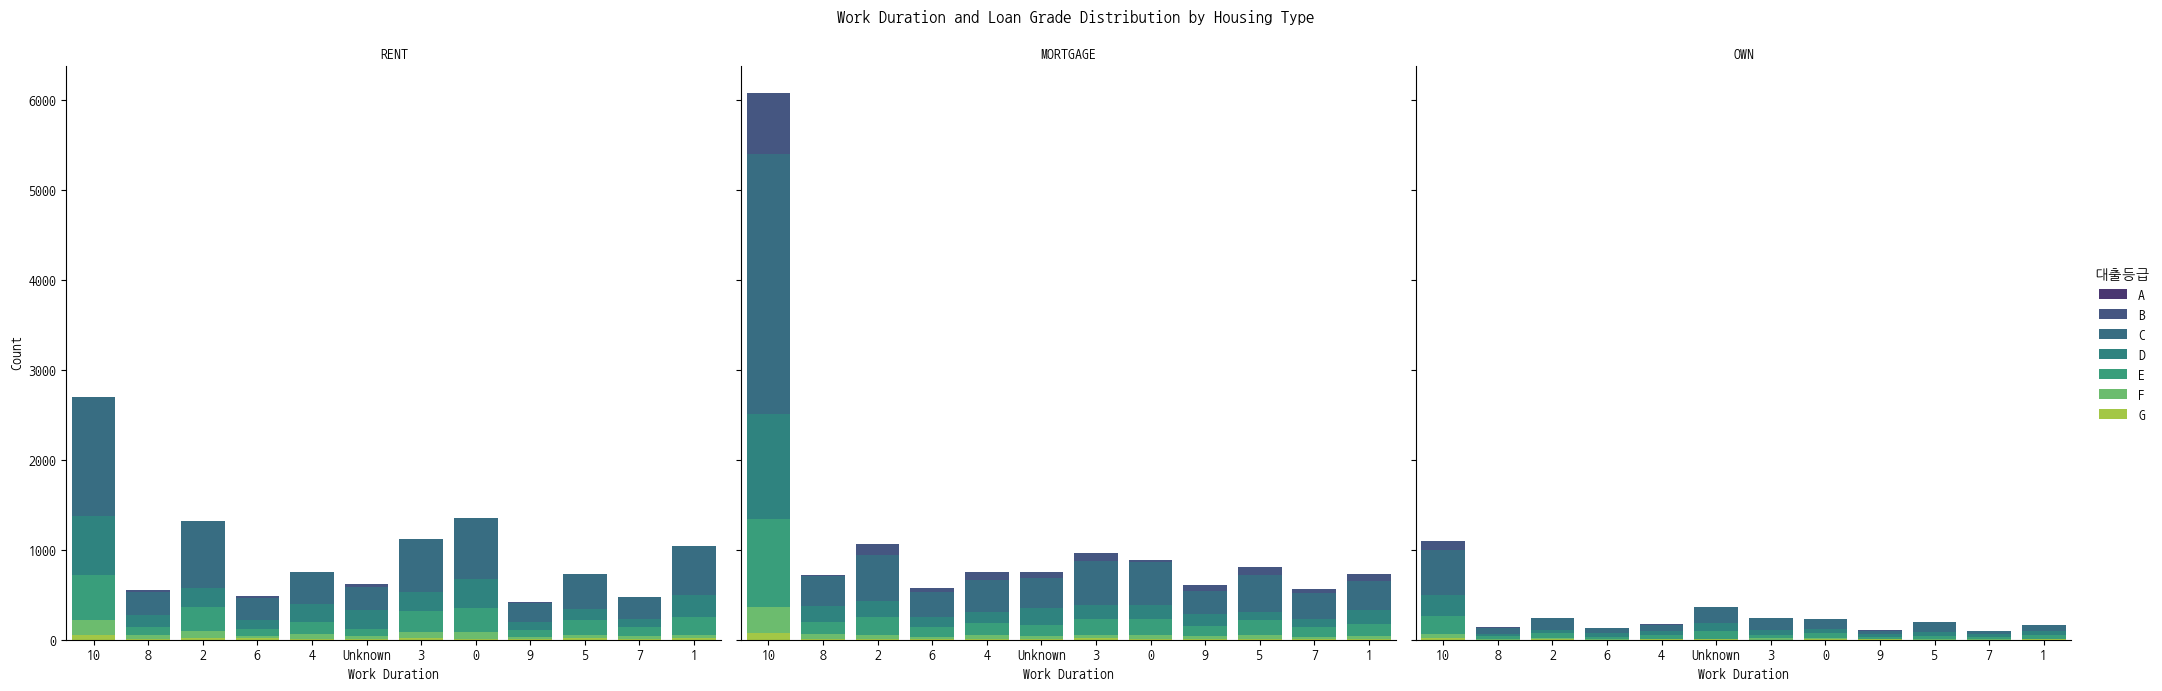

In [228]:

train_data['대출등급'] = pd.Categorical(train_data['대출등급'], categories=sorted(train_data['대출등급'].unique()))

g = sns.FacetGrid(train_data, col="주택소유상태", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_data['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()


- 실제로 주택소유유형별로 신용등급이 어떻게 포진되어있는지 확인해볼 필요가 있음
- 예상한 결과대로 안정적으로 길게 받을수 있는 유형인 10+ 모기지 형태는 기관에서 A 신용등급을 받고있음
- 신용등급 A는 [모기지]에서만 보이는 특징임
- 근무년수에 따른 나머지 신용등급 분포는 고르게 분포되어있음

/home/lab01/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


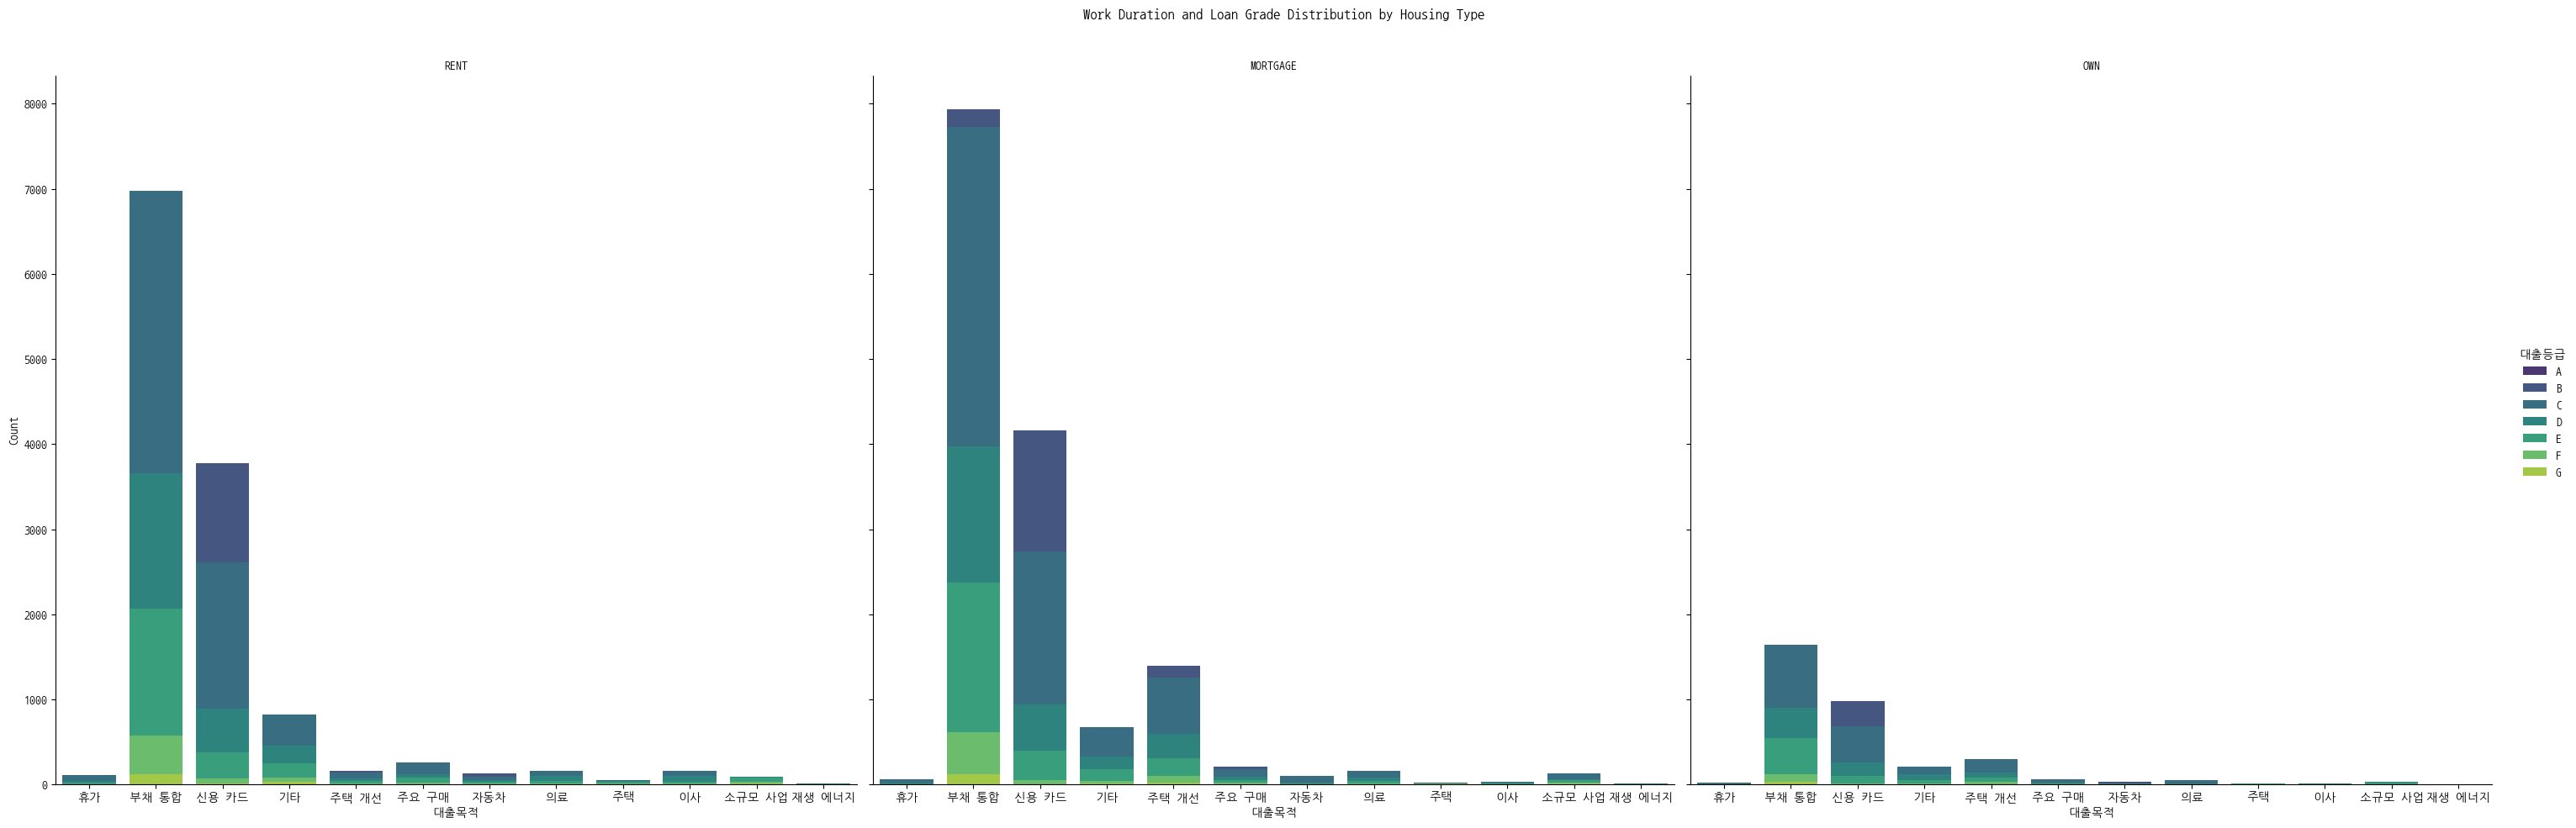

In [229]:

train_data['대출등급'] = pd.Categorical(train_data['대출등급'], categories=sorted(train_data['대출등급'].unique()))

g = sns.FacetGrid(train_data, col="주택소유상태", hue="대출등급", height=10, aspect=1, palette='viridis')

g.map(sns.countplot, "대출목적", hue_order=sorted(train_data['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('대출목적')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()


- 주택소유를 좀더 잘 관찰하기 위해 유형별 어떤 대출유형을 주로 하는 지 파악해봄
- 의미있는 파악은 못했지만
- 유독 신용카드에서 신용등급이 많이 나옴
- 신용카드 부분에서 A 는 종류없이 존재함
- 낮은 신용등급의 판단은 부채 통합에서 결정되는 거 같음

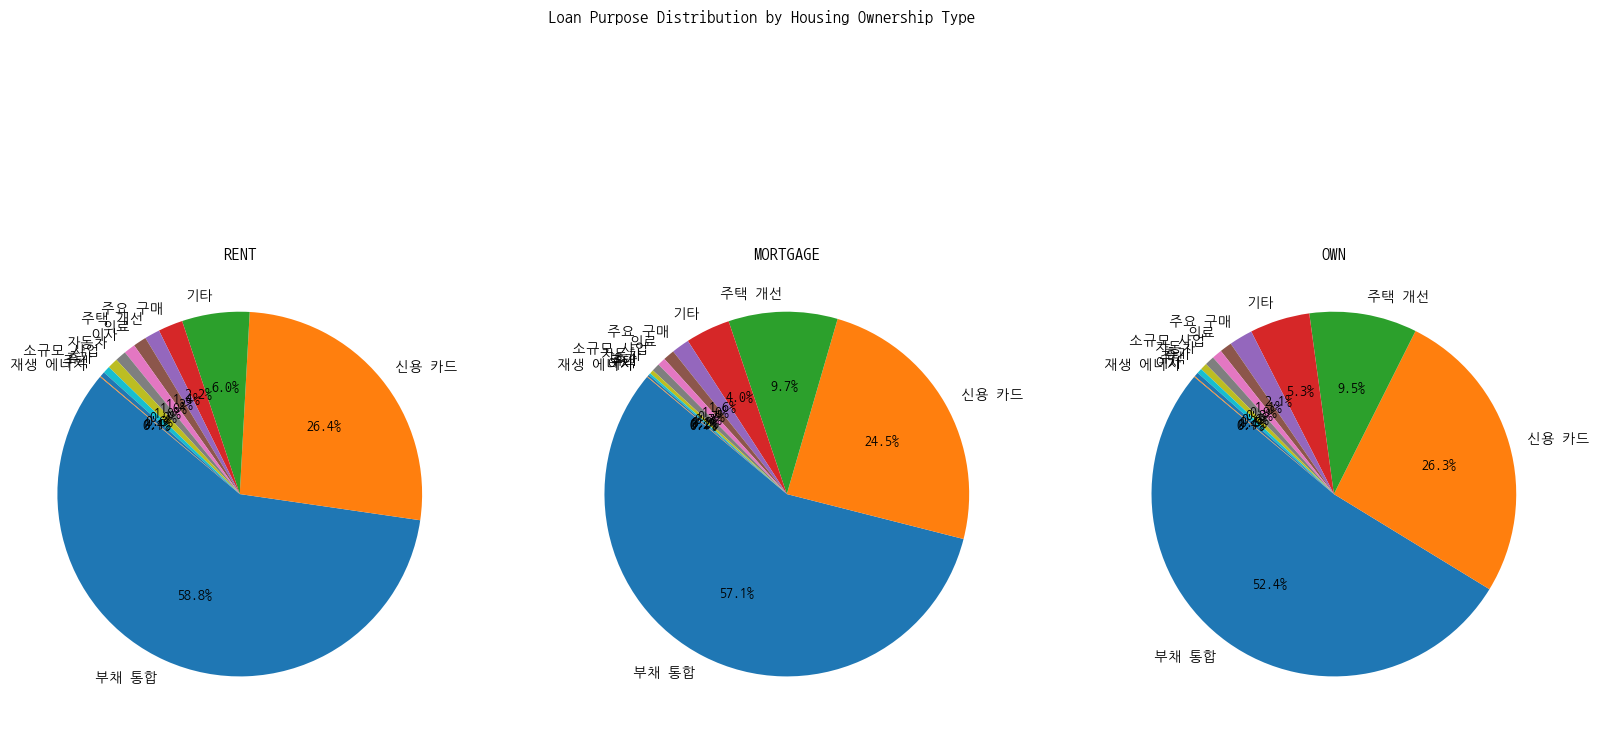

In [230]:
grouped = train_data.groupby('주택소유상태')['대출목적'].value_counts(normalize=True)

unique_housing_types = train_data['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):

    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)

plt.suptitle('Loan Purpose Distribution by Housing Ownership Type')
plt.show()

- 그러면 실제로 다들 신용카드에 사용이 많은가 확인해 봤음, 적은대도 많으면 신용카드로 신용평가가 이루어지나 생각했음
- 예상대로 큰 비중을 차지하고 있고 나머진 부채통합을 가장 큰 대출유형으로 대출하고있음
- 즉 , 대출 비중이 가장 많은건 부채 통합 ,A등급을 판단 하는 요소는 신용카드인거 같음(추측) 

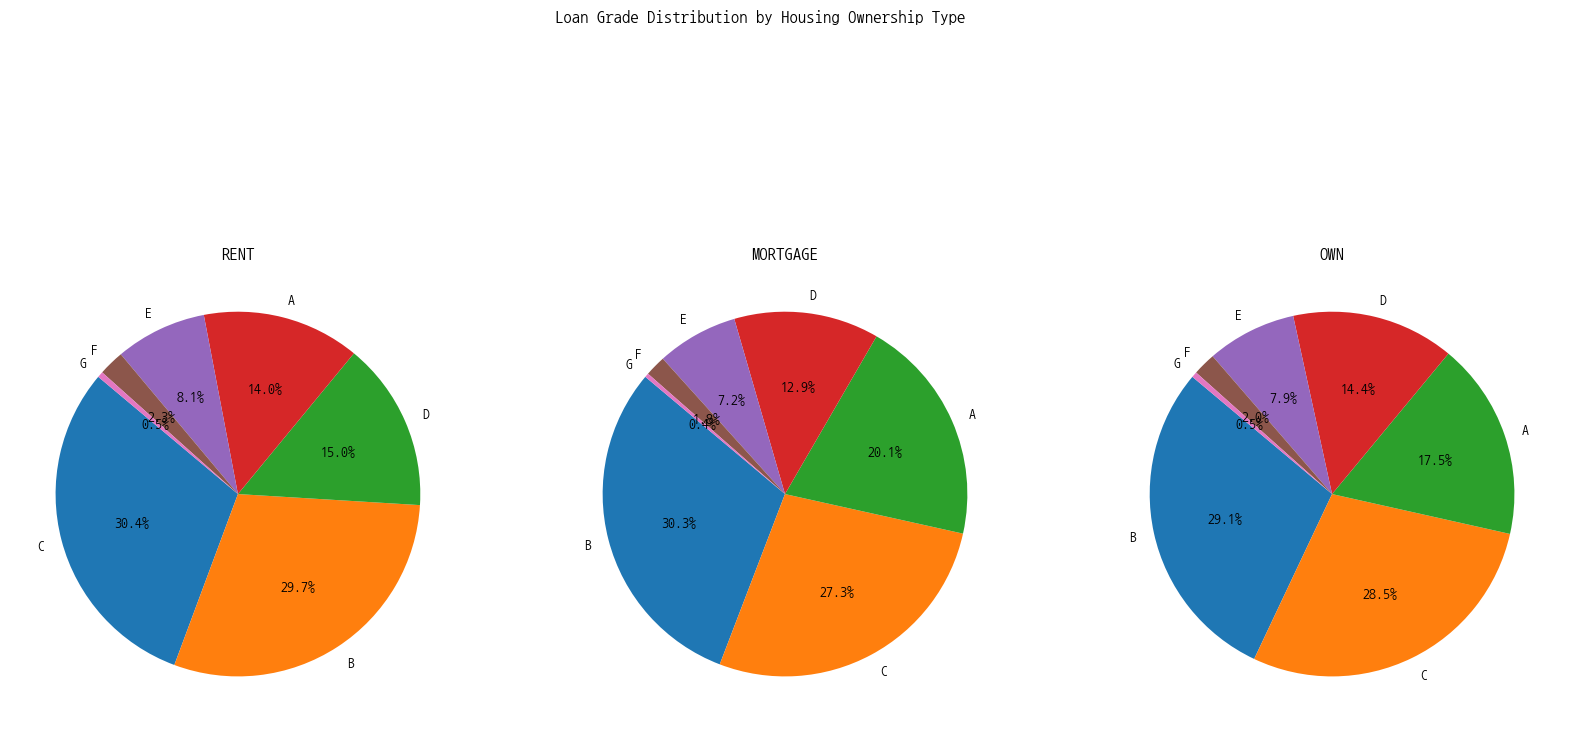

In [231]:

grouped = train_data.groupby('주택소유상태')['대출등급'].value_counts(normalize=True)

unique_housing_types = train_data['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):
    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)
plt.suptitle('Loan Grade Distribution by Housing Ownership Type')
plt.show()


- 전체 등급 그냥 고르게 분포되어있음

/tmp/ipykernel_2215/3691955211.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_housing = train_data.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)


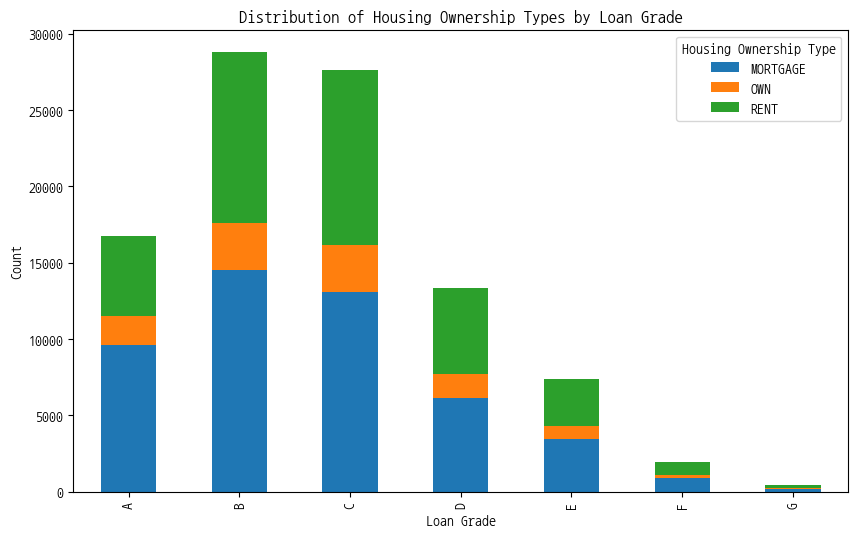

In [232]:
import matplotlib.pyplot as plt
import pandas as pd


grouped_housing = train_data.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)

grouped_housing.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Housing Ownership Types by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Housing Ownership Type')
plt.show()


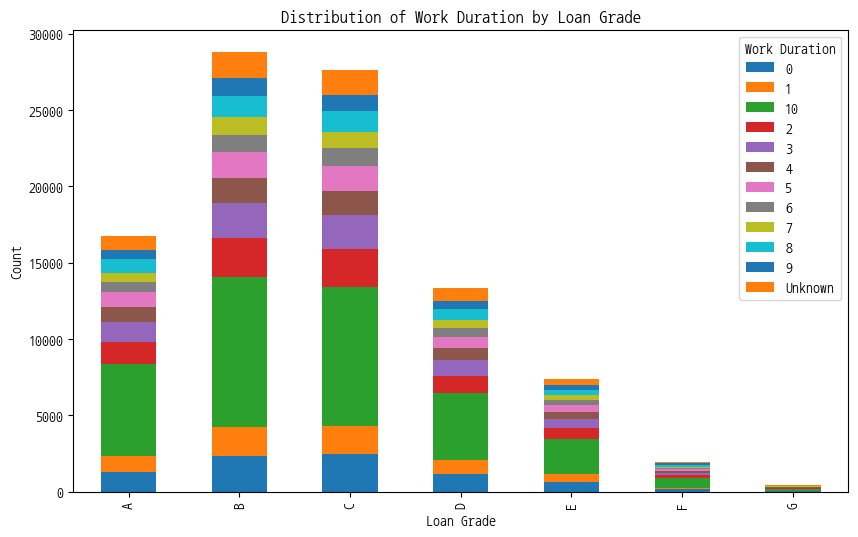

In [233]:

train_data['근로기간'] = train_data['근로기간'].astype(str)

grouped_work = train_data.groupby(['대출등급', '근로기간'], observed=True).size().unstack().fillna(0)

grouped_work.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Work Duration by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Work Duration', loc='upper right')
plt.show()

- 위에서 가정이 맞음을 확인 할 수있음
- 모기지의 형태,10+ 가 가장 좋은 신용등급을 받는 요소인거 같음 (추측)

/home/lab01/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


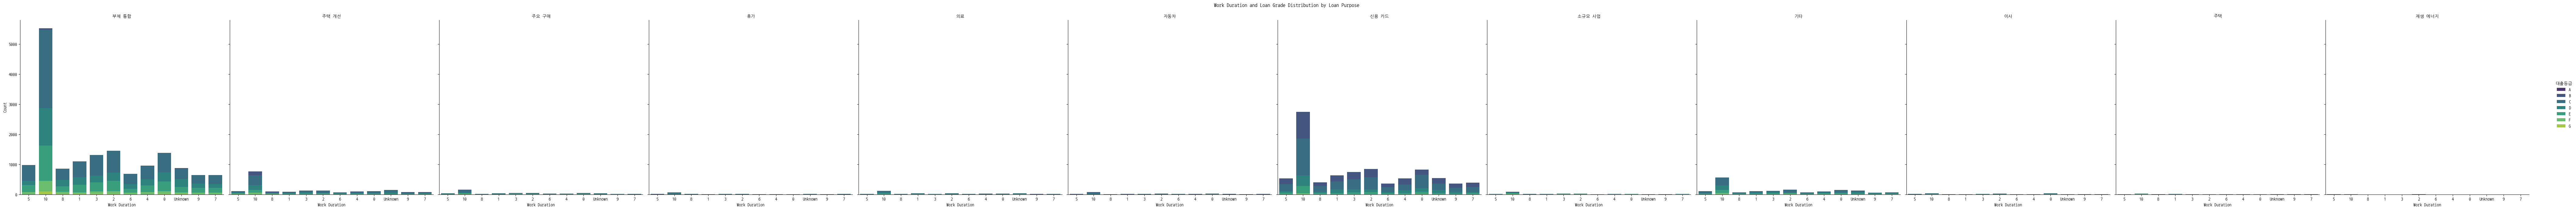

In [234]:
train_data['대출등급'] = pd.Categorical(train_data['대출등급'], categories=sorted(train_data['대출등급'].unique()))

g = sns.FacetGrid(train_data, col="대출목적", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_data['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Loan Purpose')

plt.show()

- 신용카드에 A가 많은 이유는 신용카드의 산정 방식 자체 같음
- 그리고 느낀 핵심은 부채통합과 신용카드 주택새건 이 셋이 대출을 하는 주 목적임을 알아냈음
- 10+ 이상의 사람들이 경제 활동이 가장 활발한거 같음 (확인 필요)

# 위까지는 A등급의 특징들임

In [235]:
train_data

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36.0,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60.0,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36.0,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36.0,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60.0,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36.0,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60.0,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36.0,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36.0,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


/home/lab01/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


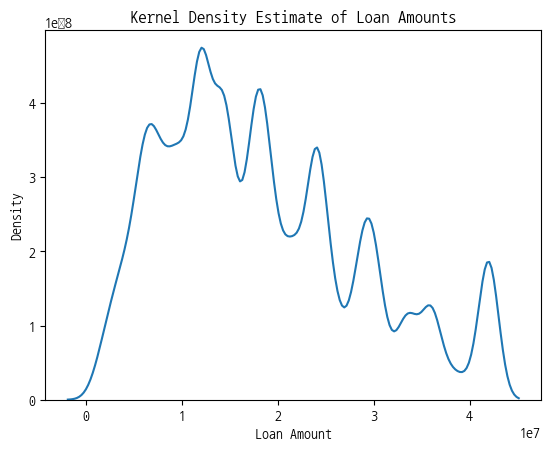

In [236]:
sns.kdeplot(data=train_data, x='대출금액')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()


/home/lab01/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


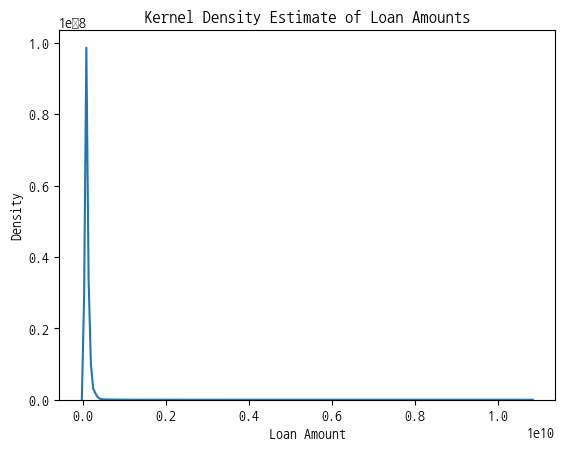

In [237]:
sns.kdeplot(data=train_data, x='연간소득')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()


In [238]:
train_data['대출금액'].describe()

count    9.629400e+04
mean     1.830400e+07
std      1.032908e+07
min      1.200000e+06
25%      1.020000e+07
50%      1.680000e+07
75%      2.400000e+07
max      4.200000e+07
Name: 대출금액, dtype: float64

In [239]:
train_data['연간소득'].describe()

count    9.629400e+04
mean     9.392672e+07
std      9.956871e+07
min      0.000000e+00
25%      5.760000e+07
50%      7.800000e+07
75%      1.128000e+08
max      1.080000e+10
Name: 연간소득, dtype: float64

In [240]:
train_data['LoanAmountQuartile'] = pd.qcut(train_data['대출금액'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

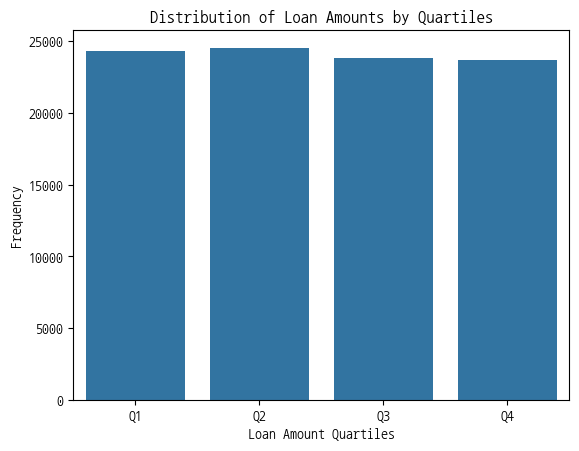

In [241]:
quartile_counts = train_data['LoanAmountQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()

In [242]:
train_data['yearsincomeQuartile'] = pd.qcut(train_data['연간소득'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

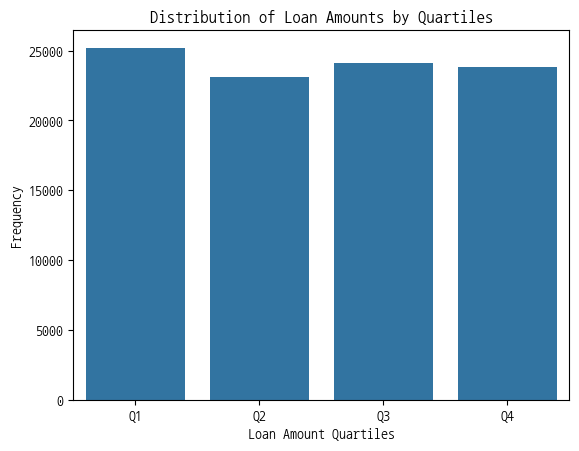

In [243]:
quartile_counts = train_data['yearsincomeQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()

In [244]:
train_data.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       'LoanAmountQuartile', 'yearsincomeQuartile'],
      dtype='object')

In [245]:
train_data.pivot_table(index=['근로기간'],columns='대출등급',values=['대출금액','연간소득'],aggfunc='mean')

대출금액                                                          \
대출등급                A             B             C             D             E   
근로기간                                                                            
0        1.745954e+07  1.623307e+07  1.688419e+07  1.882581e+07  2.118948e+07   
1        1.765563e+07  1.597760e+07  1.674177e+07  1.840165e+07  2.121231e+07   
10       1.879930e+07  1.809120e+07  1.951904e+07  2.145480e+07  2.436302e+07   
2        1.725829e+07  1.657941e+07  1.701136e+07  1.888734e+07  2.118432e+07   
3        1.744451e+07  1.644933e+07  1.752903e+07  1.868702e+07  2.136947e+07   
4        1.792455e+07  1.664821e+07  1.751996e+07  1.917113e+07  2.135189e+07   
5        1.734831e+07  1.677005e+07  1.754708e+07  1.879969e+07  2.231229e+07   
6        1.813680e+07  1.641697e+07  1.766768e+07  1.955077e+07  2.378230e+07   
7        1.803688e+07  1.645460e+07  1.789425e+07  1.929191e+07  2.303217e+07   
8        1.730609e+07  1.689832e+07  1.848220e+07  2.004539e+07  2.207166e+07   
9        1.798382e+07  1.750860e+07  1.863143e+07  1.971506e+07  2.203879e+07   
Unknown  1.554639e+07  1.315398e+07  1.332536e+07  1.440162e+07  1.657865e+07   

                                             연간소득                              \
대출등급                F             G             A             B             C   
근로기간                                                                            
0        2.186241e+07  1.938000e+07  1.089115e+08  8.817066e+07  8.522562e+07   
1        2.225400e+07  2.470759e+07  1.066027e+08  9.041137e+07  8.303698e+07   
10       2.630917e+07  2.670263e+07  1.199666e+08  1.058449e+08  9.813130e+07   
2        2.296076e+07  2.333250e+07  1.085316e+08  9.292176e+07  8.539712e+07   
3        2.135784e+07  2.341462e+07  1.128800e+08  9.203984e+07  8.718926e+07   
4        2.486680e+07  2.327880e+07  1.125600e+08  9.565855e+07  8.610673e+07   
5        2.374059e+07  2.516125e+07  1.117908e+08  9.575186e+07  8.936819e+07   
6        2.282153e+07  2.504368e+07  1.168882e+08  9.503406e+07  8.678141e+07   
7        2.424494e+07  1.984091e+07  1.250902e+08  9.689824e+07  8.640570e+07   
8        2.552812e+07  2.664300e+07  1.091748e+08  9.521531e+07  9.349182e+07   
9        2.548059e+07  2.065667e+07  1.126498e+08  9.611901e+07  9.647943e+07   
Unknown  1.655674e+07  1.816320e+07  7.379123e+07  6.281029e+07  5.619573e+07   

                                                                 
대출등급                D             E             F             G  
근로기간                                                             
0        7.648905e+07  7.833257e+07  7.376643e+07  6.425843e+07  
1        7.759490e+07  8.049425e+07  8.146001e+07  9.133672e+07  
10       9.178777e+07  9.205009e+07  9.054751e+07  8.926765e+07  
2        7.980949e+07  8.390610e+07  8.823531e+07  9.669153e+07  
3        8.398700e+07  8.500710e+07  7.981912e+07  8.045234e+07  
4        8.256038e+07  8.098402e+07  9.211190e+07  8.157989e+07  
5        8.580546e+07  8.702076e+07  8.266865e+07  8.707000e+07  
6        8.522148e+07  8.666561e+07  7.873338e+07  7.623512e+07  
7        8.576213e+07  9.151011e+07  8.089923e+07  6.772102e+07  
8        9.124018e+07  8.491499e+07  8.736585e+07  8.338200e+07  
9        8.402781e+07  8.721640e+07  9.073454e+07  7.846667e+07  
Unknown  5.297087e+07  5.322219e+07  5.291253e+07  5.474031e+07

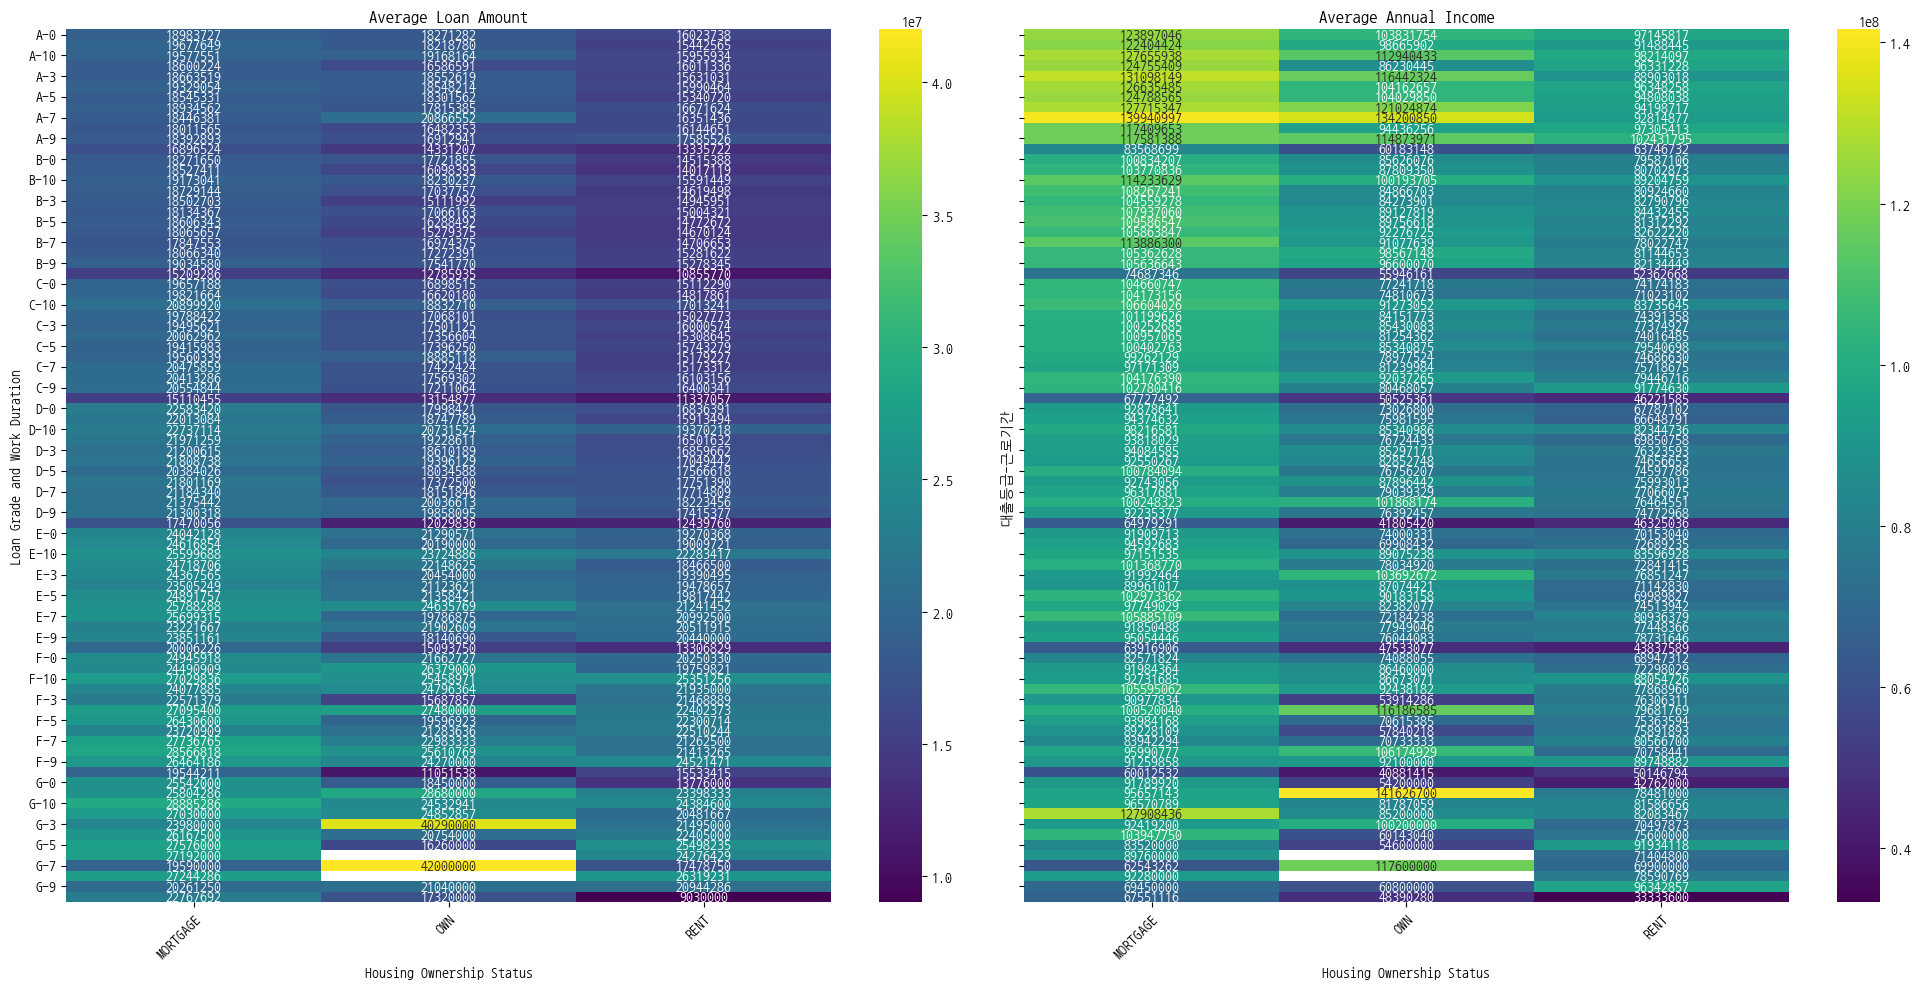

In [246]:

pivot_table = train_data.pivot_table(index=['대출등급', '근로기간'], columns='주택소유상태', values=['대출금액', '연간소득'], aggfunc='mean')

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Heatmap for average loan amount
sns.heatmap(pivot_table['대출금액'], ax=axes[0], annot=True, fmt=".0f", cmap="viridis")
axes[0].set_title('Average Loan Amount')
axes[0].set_ylabel('Loan Grade and Work Duration')
axes[0].set_xlabel('Housing Ownership Status')

# Heatmap for average annual income
sns.heatmap(pivot_table['연간소득'], ax=axes[1], annot=True, fmt=".0f", cmap="viridis")
axes[1].set_title('Average Annual Income')
axes[1].set_xlabel('Housing Ownership Status')

# Rotate the x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


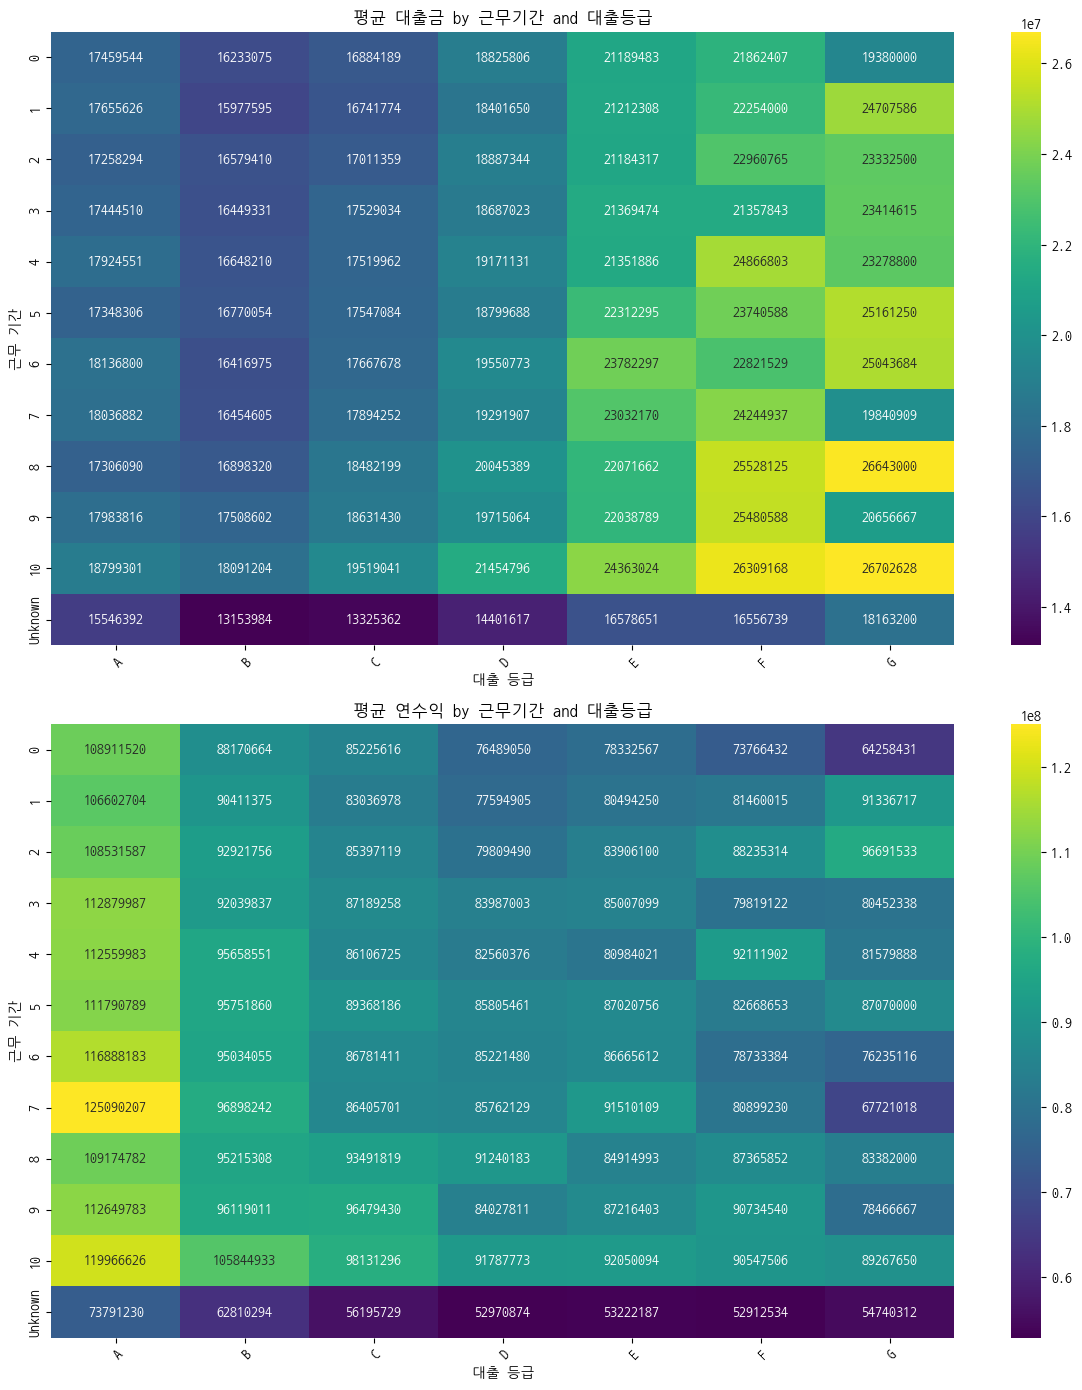

In [249]:
def custom_sort_key(x):
    if x == "Unknown":
        return np.inf 
    try:
        return int(x) 
    except ValueError:
        return np.inf 

train_data['Sorted근로기간'] = train_data['근로기간'].apply(custom_sort_key)
train_data_sorted = train_data.sort_values(by='Sorted근로기간')

loan_amount_pivot = train_data_sorted.pivot_table(index=['Sorted근로기간'], columns='대출등급', values='대출금액', aggfunc='mean')
annual_income_pivot = train_data_sorted.pivot_table(index=['Sorted근로기간'], columns='대출등급', values='연간소득', aggfunc='mean')

loan_amount_pivot.index = loan_amount_pivot.index.map(lambda x: "Unknown" if x == np.inf else str(int(x)))
annual_income_pivot.index = annual_income_pivot.index.map(lambda x: "Unknown" if x == np.inf else str(int(x)))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

sns.heatmap(loan_amount_pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[0])
axes[0].set_title('평균 대출금 by 근무기간 and 대출등급')
axes[0].set_xlabel('대출 등급')
axes[0].set_ylabel('근무 기간')

sns.heatmap(annual_income_pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[1])
axes[1].set_title('평균 연수익 by 근무기간 and 대출등급')
axes[1].set_xlabel('대출 등급')
axes[1].set_ylabel('근무 기간')

# Rotate the x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


- 평균 대출금 by 근무기간 and 대출등급
  - 확실히 대출 등급이 낮은 사람들은 평균적으로 더 많은 대출금을 받고있음-10+ 유독 높음, 년차가 높아질 수록 대출금이 많아짐,(7->8->9)에서 유독 변동이 심함
  - 대출등급이 높을 수록 빌리는 돈이 낮아짐>경제적으로 안정적이여서 빌릴 돈도 적음> 기관에서는 부담없이 대출을 해줄 수 있다

- 연 수익 by 근무기간 and 대출등급
  - 6년까지 점점 수익이 늘다가 갑자기 떨어짐 (이시기 무슨 이벤트가 있었는지 모르겠음)
 
- 평균 대출금 6->7에서 갑자기 확떨어짐 and 평균 연수익도 같이 확 떨어짐
  - 경제 활동을 하면 대출도 많이 한다, 혹은 이벤트 결혼 준비 이직같은 이벤트 발생, 일시적인 공백 발생 >> 이때 소득이 없다 일자리가 다시생기면 이사비 결혼비 다양한 이유로 대출 다시 시작?
 
> # 근무기간 간격간의 소득이 불안 할 수록 신용등급이 좋지 않다!!

- unkown을 제외하고 분석// 오브젝트라 코드에서 에러 뜸

In [285]:
pivot_table=train_data.pivot_table(index='대출등급',columns='근로기간_coerce',values='부채_대비_소득_비율')
pivot_table

근로기간_coerce,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
대출등급,,,,,,,,,,,
A,15.830706,16.201794,15.919243,16.470951,16.231631,16.262890,16.458738,16.510727,16.678201,16.662367,16.903991
B,17.597747,17.574660,17.722563,17.713588,17.713822,17.996045,17.938349,18.630009,18.198906,18.396684,18.416517
C,19.095276,19.433962,19.155138,19.215025,19.504604,19.676100,19.818941,20.041704,20.230645,20.484080,20.290644
D,20.898781,21.134800,20.918491,21.409319,20.417688,20.770679,21.856280,21.769794,22.017694,22.212991,22.229767
E,21.822052,20.735052,21.331727,21.433536,22.411977,21.789284,23.456182,21.998931,21.818519,22.219516,22.597443
F,21.602531,20.440273,20.220471,22.112288,20.478689,21.492101,23.352353,20.650127,21.543984,21.740000,22.495455
G,17.199615,21.129655,21.678889,21.977179,16.784400,19.725417,22.151579,20.906818,20.595000,17.874444,21.069051


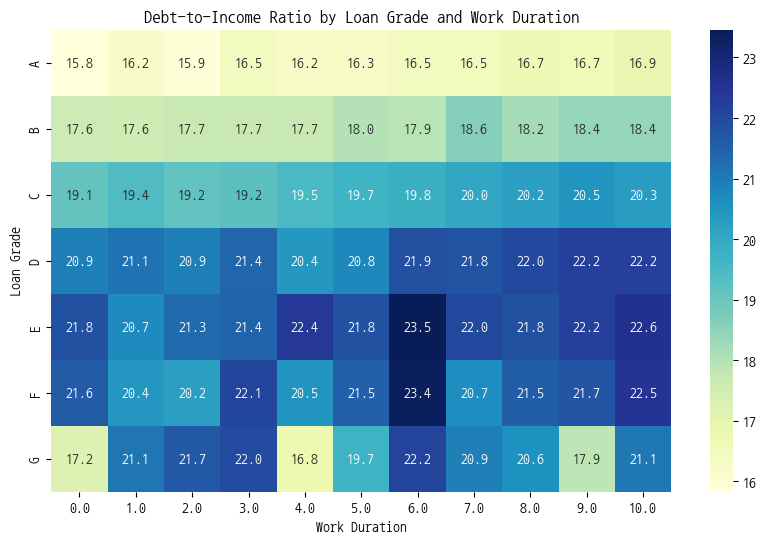

In [286]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Debt-to-Income Ratio by Loan Grade and Work Duration')
plt.xlabel('Work Duration')
plt.ylabel('Loan Grade')
plt.show()


- 등급이 높을 수록 근무기간에 따른 소득의 분산이 크지가 않다는 것을 확인 할 수 있다.
- 반대로 낮을 수록 근무기간 사이 분산차이가 큼을 알 수가 있었다
- 위의 과정이 맞는 사실임을 알수 있었다

In [309]:
pivot_table =train_data.pivot_table(index='대출등급',columns='근로기간_coerce',values=['부채_대비_소득_비율','연간소득'])
pivot_table

부채_대비_소득_비율                                              \
근로기간_coerce        0.0        1.0        2.0        3.0        4.0    
대출등급                                                                  
A             15.830706  16.201794  15.919243  16.470951  16.231631   
B             17.597747  17.574660  17.722563  17.713588  17.713822   
C             19.095276  19.433962  19.155138  19.215025  19.504604   
D             20.898781  21.134800  20.918491  21.409319  20.417688   
E             21.822052  20.735052  21.331727  21.433536  22.411977   
F             21.602531  20.440273  20.220471  22.112288  20.478689   
G             17.199615  21.129655  21.678889  21.977179  16.784400   

                                                                    ...  \
근로기간_coerce       5.0        6.0        7.0        8.0        9.0   ...   
대출등급                                                                ...   
A            16.262890  16.458738  16.510727  16.678201  16.662367  ...   
B            17.996045  17.938349  18.630009  18.198906  18.396684  ...   
C            19.676100  19.818941  20.041704  20.230645  20.484080  ...   
D            20.770679  21.856280  21.769794  22.017694  22.212991  ...   
E            21.789284  23.456182  21.998931  21.818519  22.219516  ...   
F            21.492101  23.352353  20.650127  21.543984  21.740000  ...   
G            19.725417  22.151579  20.906818  20.595000  17.874444  ...   

                     연간소득                                            \
근로기간_coerce          1.0           2.0           3.0           4.0    
대출등급                                                                  
A            1.066027e+08  1.085316e+08  1.128800e+08  1.125600e+08   
B            9.041137e+07  9.292176e+07  9.203984e+07  9.565855e+07   
C            8.303698e+07  8.539712e+07  8.718926e+07  8.610673e+07   
D            7.759490e+07  7.980949e+07  8.398700e+07  8.256038e+07   
E            8.049425e+07  8.390610e+07  8.500710e+07  8.098402e+07   
F            8.146001e+07  8.823531e+07  7.981912e+07  9.211190e+07   
G            9.133672e+07  9.669153e+07  8.045234e+07  8.157989e+07   

                                                                     \
근로기간_coerce          5.0           6.0           7.0           8.0    
대출등급                                                                  
A            1.117908e+08  1.168882e+08  1.250902e+08  1.091748e+08   
B            9.575186e+07  9.503406e+07  9.689824e+07  9.521531e+07   
C            8.936819e+07  8.678141e+07  8.640570e+07  9.349182e+07   
D            8.580546e+07  8.522148e+07  8.576213e+07  9.124018e+07   
E            8.702076e+07  8.666561e+07  9.151011e+07  8.491499e+07   
F            8.266865e+07  7.873338e+07  8.089923e+07  8.736585e+07   
G            8.707000e+07  7.623512e+07  6.772102e+07  8.338200e+07   

                                         
근로기간_coerce          9.0           10.0  
대출등급                                     
A            1.126498e+08  1.199666e+08  
B            9.611901e+07  1.058449e+08  
C            9.647943e+07  9.813130e+07  
D            8.402781e+07  9.178777e+07  
E            8.721640e+07  9.205009e+07  
F            9.073454e+07  9.054751e+07  
G            7.846667e+07  8.926765e+07  

[7 rows x 22 columns]

Text(0, 0.5, 'Annual Income')

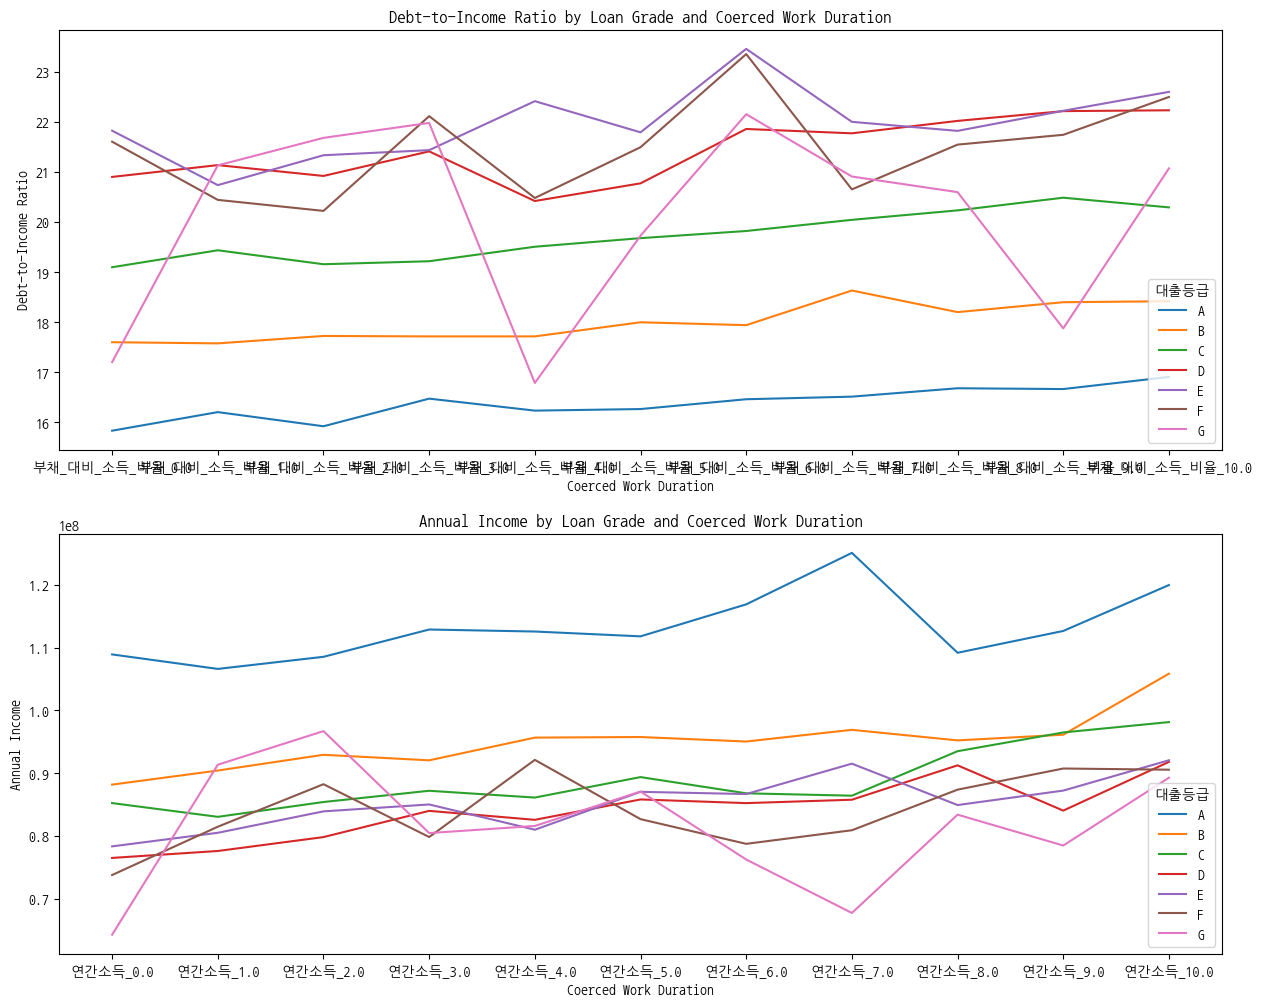

In [304]:
# Convert the multi-level column names to a single level by joining with an underscore
pivot_table.columns = ['_'.join(map(str, col)).strip() for col in pivot_table.columns.values]

# Melt the flattened pivot table for plotting
melted_pivot = pivot_table.reset_index().melt(id_vars='대출등급')

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot for Debt-to-Income Ratio
dti_data = melted_pivot[melted_pivot['variable'].str.contains('부채_대비_소득_비율')]
sns.lineplot(data=dti_data, x='variable', y='value', hue='대출등급', ax=axes[0])
axes[0].set_title('Debt-to-Income Ratio by Loan Grade and Coerced Work Duration')
axes[0].set_xlabel('Coerced Work Duration')
axes[0].set_ylabel('Debt-to-Income Ratio')

# Plot for Annual Income
income_data = melted_pivot[melted_pivot['variable'].str.contains('연간소득')]
sns.lineplot(data=income_data, x='variable', y='value', hue='대출등급', ax=axes[1])
axes[1].set_title('Annual Income by Loan Grade and Coerced Work Duration')
axes[1].set_xlabel('Coerced Work Duration')
axes[1].set_ylabel('Annual Income')



In [314]:
train_data['대출기간_범주']=train_data['대출기간'].map({36.0:'36',60.0:'60'})

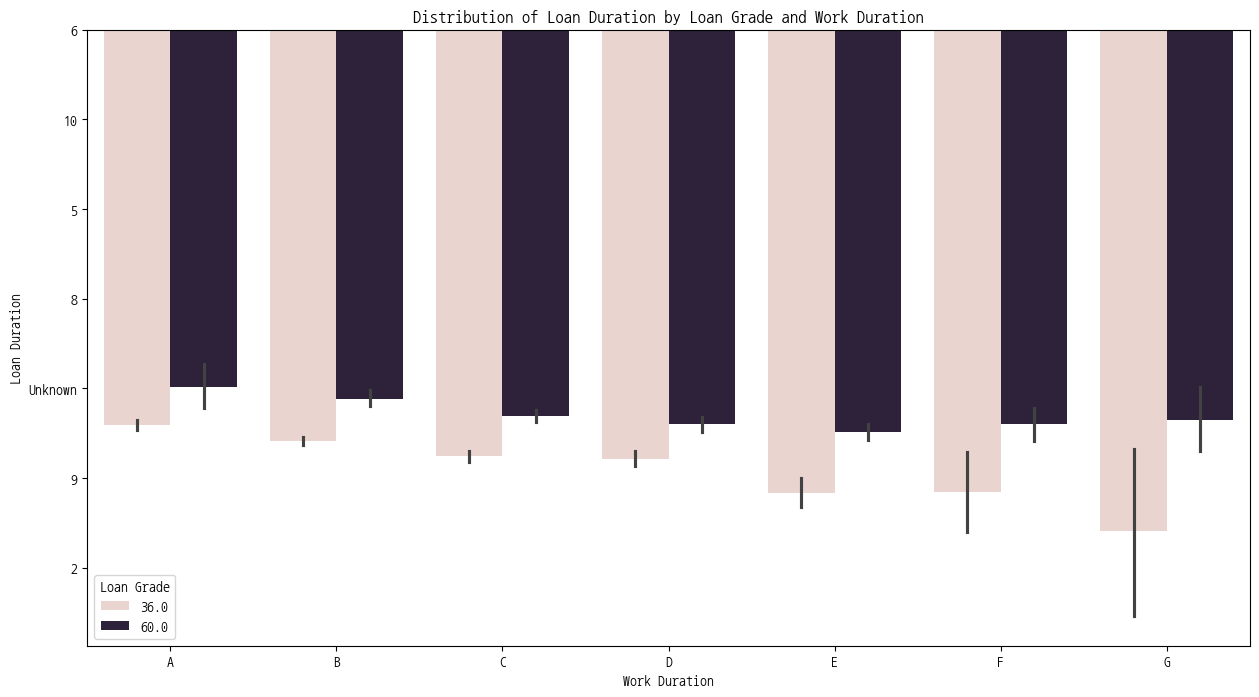

In [322]:

plt.figure(figsize=(15, 8))
sns.barplot(x='대출등급', y='근로기간', hue='대출기간', data=train_data)

plt.title('Distribution of Loan Duration by Loan Grade and Work Duration')
plt.xlabel('Work Duration')
plt.ylabel('Loan Duration')
plt.legend(title='Loan Grade')
plt.show()

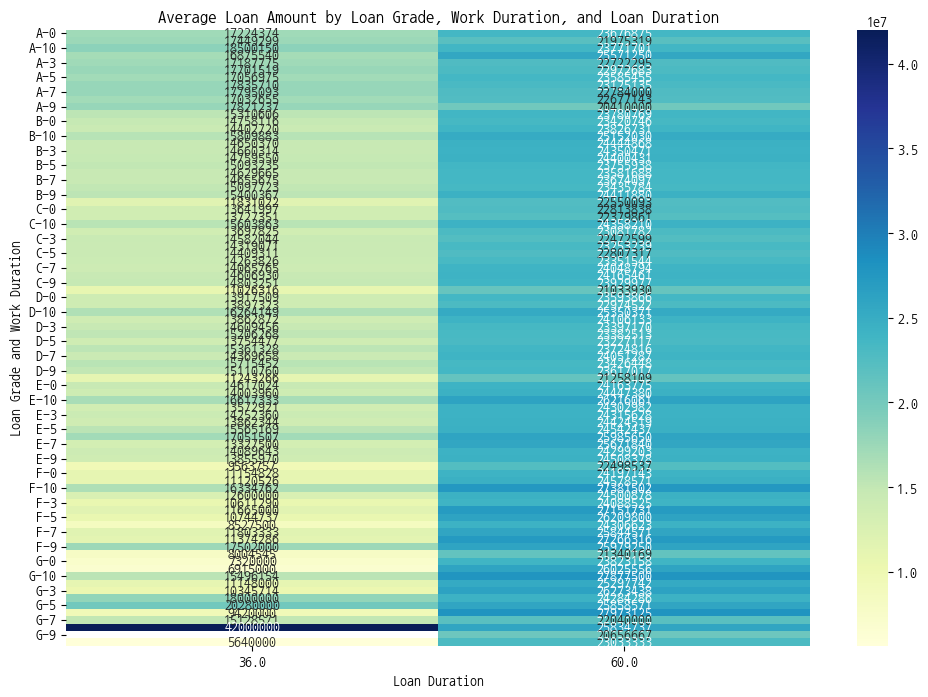

In [326]:
pivot_table = train_data.pivot_table(index=['대출등급', '근로기간'], columns='대출기간', values='대출금액')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Average Loan Amount by Loan Grade, Work Duration, and Loan Duration')
plt.xlabel('Loan Duration')
plt.ylabel('Loan Grade and Work Duration')
plt.show()

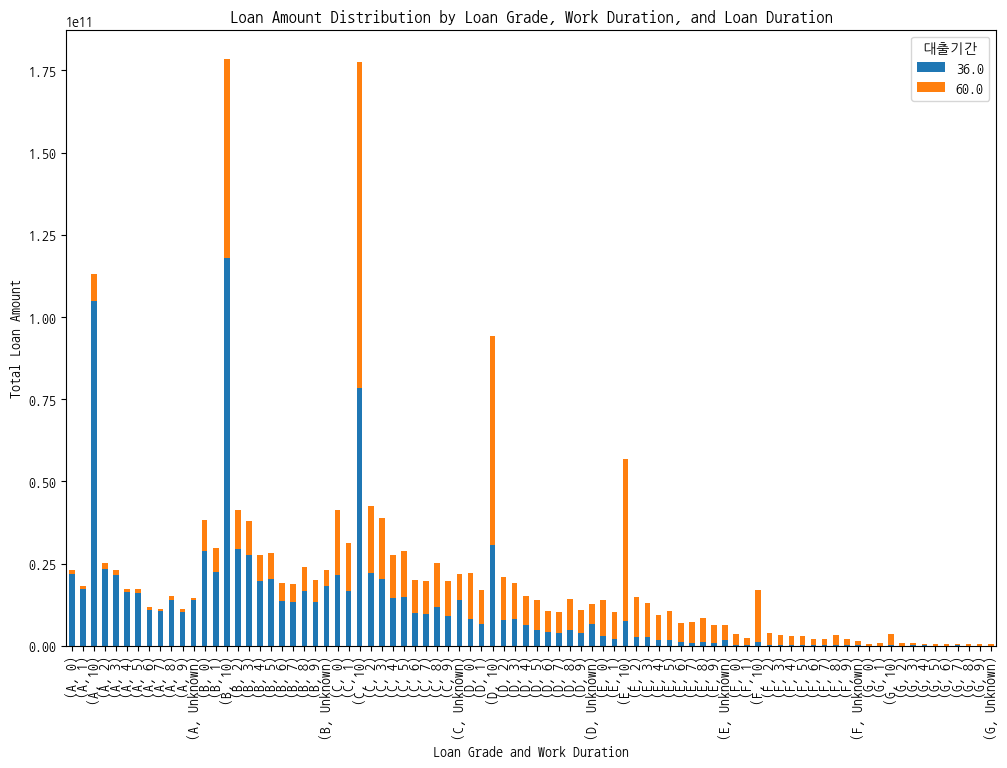

In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = train_data.pivot_table(index=['대출등급', '근로기간'], columns='대출기간', values='대출금액', aggfunc='sum')

# Plotting a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Amount Distribution by Loan Grade, Work Duration, and Loan Duration')
plt.xlabel('Loan Grade and Work Duration')
plt.ylabel('Total Loan Amount')
plt.show()


/tmp/ipykernel_2215/1881705995.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x='대출등급', y='연체계좌수', hue='근로기간', ci=None)


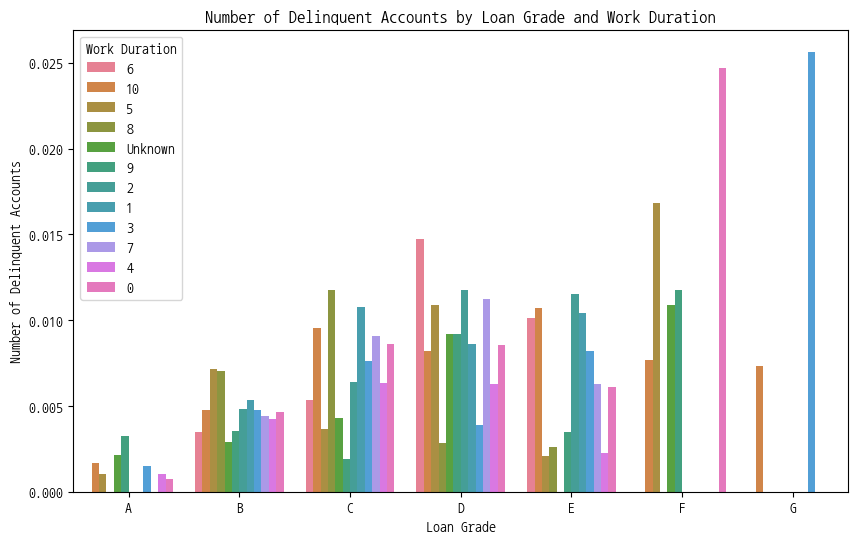

In [331]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='대출등급', y='연체계좌수', hue='근로기간', ci=None)
plt.title('Number of Delinquent Accounts by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Delinquent Accounts')
plt.legend(title='Work Duration')
plt.show()

- 신용등급이 낮을수록 근로기간종류에 따른 연체된 계좌수가 적음을 알수가 있음

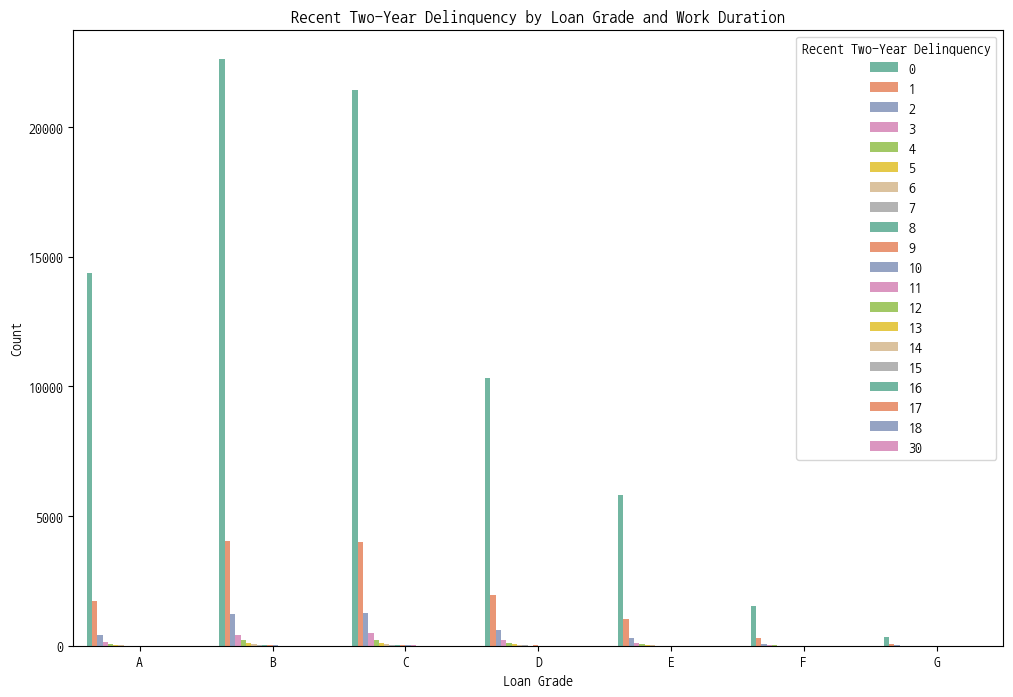

In [333]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='대출등급', hue='최근_2년간_연체_횟수', palette="Set2")

plt.title('Recent Two-Year Delinquency by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Recent Two-Year Delinquency', loc='upper right')
plt.show()

- 연체 횟수가 적으면 적을 술록 대출등급이 낮음
  - 이유를 모르겠음- 에초에 빌려주지 않아서? 

In [341]:
train_data.pivot_table(index='대출등급',columns='최근_2년간_연체_횟수',values='대출금액',aggfunc='mean')

최근_2년간_연체_횟수,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,30
대출등급,,,,,,,,,,,,,,,,,,,,
A,1.794762e+07,1.790523e+07,1.785629e+07,1.646826e+07,1.603200e+07,1.415364e+07,1.379143e+07,1.656000e+07,1.275000e+07,1.740000e+07,14712000.0,NaN,NaN,12000000.0,8400000.0,16800000.0,NaN,NaN,9600000.0,NaN
B,1.700586e+07,1.664096e+07,1.643678e+07,1.556485e+07,1.483832e+07,1.492128e+07,1.452097e+07,1.463657e+07,1.454889e+07,1.495500e+07,10920000.0,12405000.0,21850000.0,14497500.0,7200000.0,NaN,18600000.0,NaN,NaN,NaN
C,1.789116e+07,1.802708e+07,1.802413e+07,1.718956e+07,1.817974e+07,1.602477e+07,1.694077e+07,1.720250e+07,1.598864e+07,1.203231e+07,17865000.0,12880000.0,16080000.0,5955000.0,7600000.0,NaN,22755000.0,NaN,NaN,18000000.0
D,1.942988e+07,2.012861e+07,1.970017e+07,2.008146e+07,1.715883e+07,2.068731e+07,1.818091e+07,2.184462e+07,2.301375e+07,1.333091e+07,10800000.0,13050000.0,18600000.0,NaN,26400000.0,NaN,11700000.0,NaN,NaN,NaN
E,2.213789e+07,2.290987e+07,2.395500e+07,2.334500e+07,1.913020e+07,2.125038e+07,2.483786e+07,2.461500e+07,2.136000e+07,1.824000e+07,25200000.0,NaN,25200000.0,2580000.0,NaN,30000000.0,NaN,NaN,6840000.0,NaN
F,2.367385e+07,2.496427e+07,2.625112e+07,2.433568e+07,2.677833e+07,2.640000e+07,2.232000e+07,3.354000e+07,2.400000e+07,2.456000e+07,12960000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,2.364511e+07,2.374415e+07,2.527625e+07,2.631000e+07,3.730500e+07,NaN,3.810000e+07,3.364500e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160000.0,NaN,NaN


In [351]:
train_data.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='최근_2년간_연체_횟수', aggfunc='size')

ValueError: Grouper for '최근_2년간_연체_횟수' not 1-dimensional

In [352]:
pivot_table = train_data.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='대출금액', aggfunc='mean')
pivot_table

최근_2년간_연체_횟수,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,30
대출등급,,,,,,,,,,,,,,,,,,,,
A,1.794762e+07,1.790523e+07,1.785629e+07,1.646826e+07,1.603200e+07,1.415364e+07,1.379143e+07,1.656000e+07,1.275000e+07,1.740000e+07,14712000.0,NaN,NaN,12000000.0,8400000.0,16800000.0,NaN,NaN,9600000.0,NaN
B,1.700586e+07,1.664096e+07,1.643678e+07,1.556485e+07,1.483832e+07,1.492128e+07,1.452097e+07,1.463657e+07,1.454889e+07,1.495500e+07,10920000.0,12405000.0,21850000.0,14497500.0,7200000.0,NaN,18600000.0,NaN,NaN,NaN
C,1.789116e+07,1.802708e+07,1.802413e+07,1.718956e+07,1.817974e+07,1.602477e+07,1.694077e+07,1.720250e+07,1.598864e+07,1.203231e+07,17865000.0,12880000.0,16080000.0,5955000.0,7600000.0,NaN,22755000.0,NaN,NaN,18000000.0
D,1.942988e+07,2.012861e+07,1.970017e+07,2.008146e+07,1.715883e+07,2.068731e+07,1.818091e+07,2.184462e+07,2.301375e+07,1.333091e+07,10800000.0,13050000.0,18600000.0,NaN,26400000.0,NaN,11700000.0,NaN,NaN,NaN
E,2.213789e+07,2.290987e+07,2.395500e+07,2.334500e+07,1.913020e+07,2.125038e+07,2.483786e+07,2.461500e+07,2.136000e+07,1.824000e+07,25200000.0,NaN,25200000.0,2580000.0,NaN,30000000.0,NaN,NaN,6840000.0,NaN
F,2.367385e+07,2.496427e+07,2.625112e+07,2.433568e+07,2.677833e+07,2.640000e+07,2.232000e+07,3.354000e+07,2.400000e+07,2.456000e+07,12960000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,2.364511e+07,2.374415e+07,2.527625e+07,2.631000e+07,3.730500e+07,NaN,3.810000e+07,3.364500e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20160000.0,NaN,NaN


In [355]:
pivot_table.T.sort_values(by="A")

대출등급,A,B,C,D,E,F,G
최근_2년간_연체_횟수,,,,,,,
14,8.400000e+06,7.200000e+06,7.600000e+06,2.640000e+07,NaN,NaN,NaN
18,9.600000e+06,NaN,NaN,NaN,6.840000e+06,NaN,NaN
13,1.200000e+07,1.449750e+07,5.955000e+06,NaN,2.580000e+06,NaN,NaN
8,1.275000e+07,1.454889e+07,1.598864e+07,2.301375e+07,2.136000e+07,2.400000e+07,NaN
6,1.379143e+07,1.452097e+07,1.694077e+07,1.818091e+07,2.483786e+07,2.232000e+07,3.810000e+07
5,1.415364e+07,1.492128e+07,1.602477e+07,2.068731e+07,2.125038e+07,2.640000e+07,NaN
10,1.471200e+07,1.092000e+07,1.786500e+07,1.080000e+07,2.520000e+07,1.296000e+07,NaN
4,1.603200e+07,1.483832e+07,1.817974e+07,1.715883e+07,1.913020e+07,2.677833e+07,3.730500e+07
3,1.646826e+07,1.556485e+07,1.718956e+07,2.008146e+07,2.334500e+07,2.433568e+07,2.631000e+07


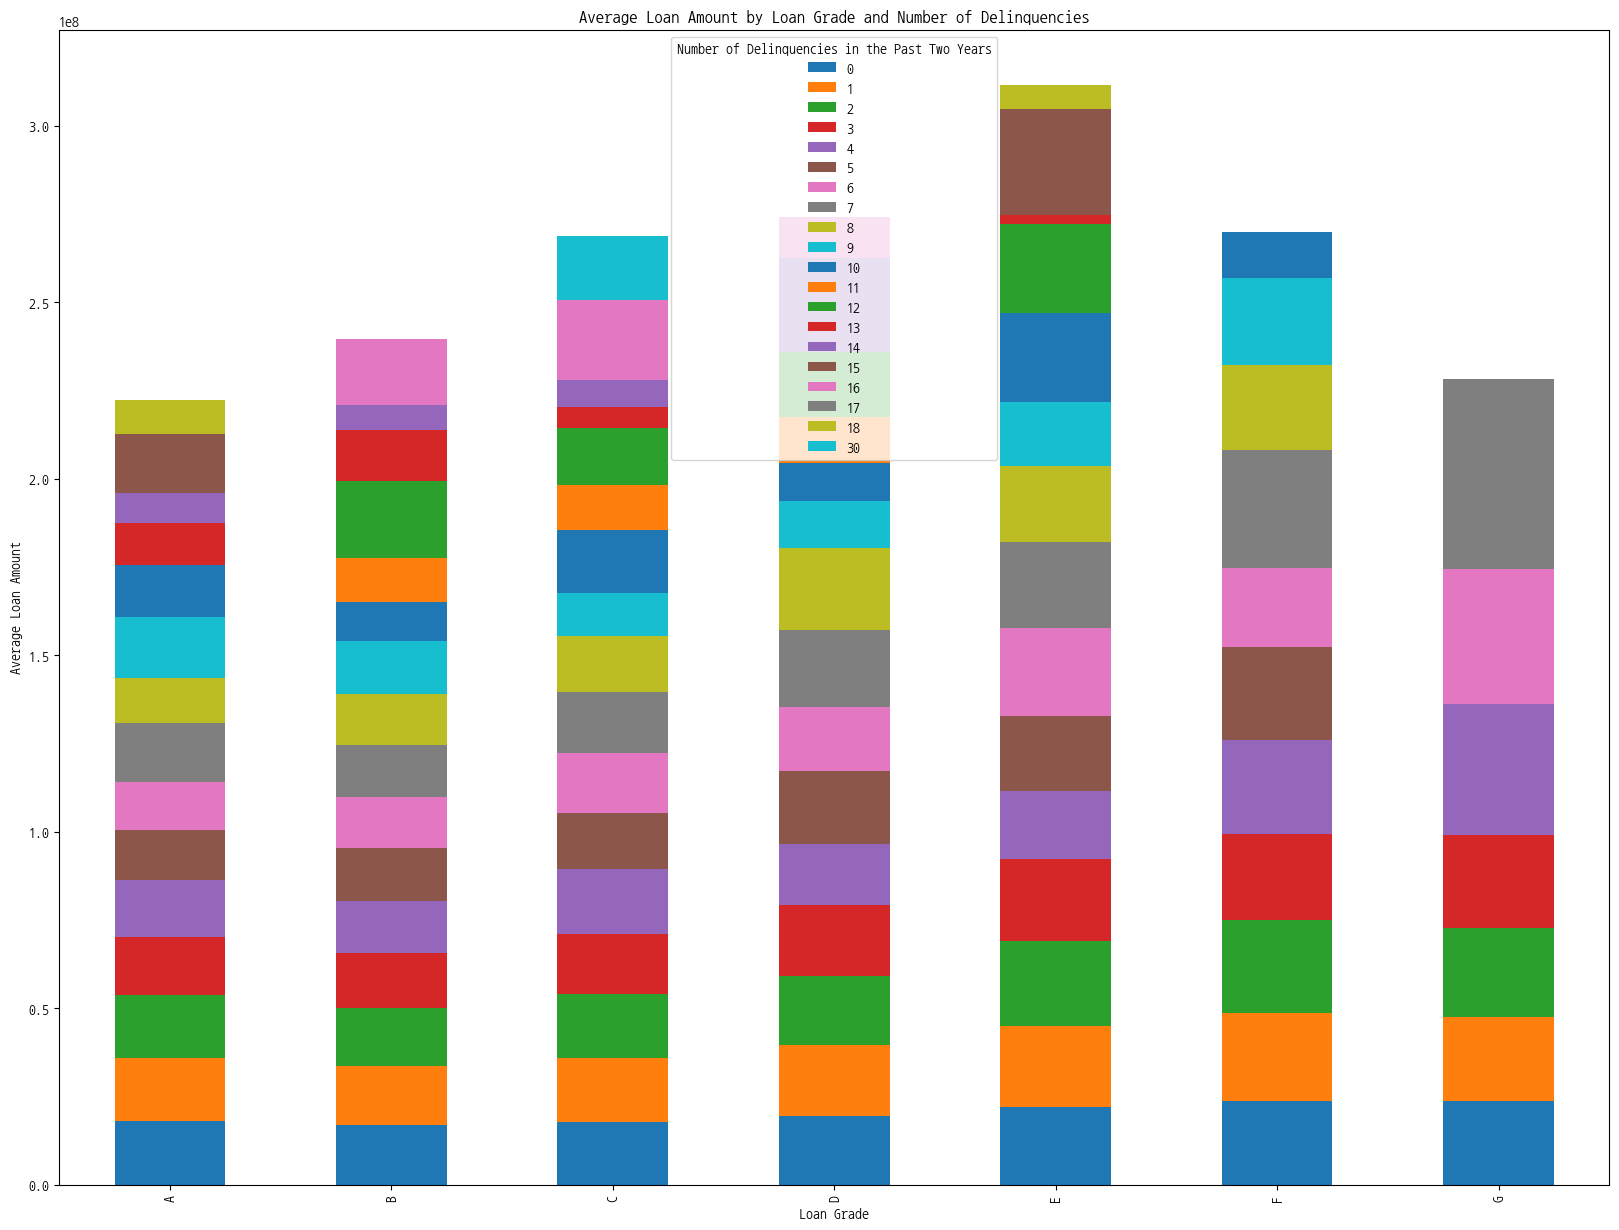

In [343]:
pivot_table = train_data.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='대출금액', aggfunc='mean')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Average Loan Amount by Loan Grade and Number of Delinquencies')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Number of Delinquencies in the Past Two Years')
plt.show()

In [350]:
corrected_pivot_table = train_data.pivot_table(index='대출등급', 
                                               columns='최근_2년간_연체_횟수', 
                                               values='최근_2년간_연체_횟수', 
                                               aggfunc='size')


ValueError: Grouper for '최근_2년간_연체_횟수' not 1-dimensional